In [1]:
import requests
import re
from bs4 import BeautifulSoup
import numpy as np
import scipy 
import scipy.stats
from scipy import stats
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from itertools import groupby
import pickle
import os
import math
from sympy import S, symbols
from collections import Counter

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')
#sns.mpl.rcParams['figure.figsize'] = (16, 10)

# Directory to store pickled dataframes
directory = '/Users/dianaow/Documents/formula-1-race-data/dataframes/'

pd.options.mode.chained_assignment = None 

In [204]:
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

Automatically created module for IPython interactive environment


In [3]:
def read_from_pickle(directory, filename):
    df = pd.DataFrame()
    filepath = directory + filename
    with open(filepath, 'rb') as file:
        df = pickle.load(file)
            
    return df

In [4]:
df_races = read_from_pickle(directory, "df_races.pickle")
races_names = list(df_races[df_races['year'] == 2017].name.unique())

In [5]:
races = ['australian-grand-prix',
         'chinese-grand-prix',
         'bahrain-grand-prix',
         'russian-grand-prix',
         'spanish-grand-prix',
         'monaco-grand-prix',
         'canadian-grand-prix',
         'european-grand-prix',
         'austrian-grand-prix',
         'british-grand-prix',
         'hungarian-grand-prix',
         'belgian-grand-prix',
         'italian-grand-prix',
         'singapore-grand-prix',
         'malaysian-grand-prix',
         'japanese-grand-prix',
         'united-states-grand-prix',
         'mexican-grand-prix',
         'brazilian-grand-prix',
         'abu-dhabi-grand-prix']

In [6]:
race_short = {'Japanese Grand Prix': "JPN", 'Malaysian Grand Prix': "MY", 'British Grand Prix': "GB",
               'Monaco Grand Prix': "MC", 'Singapore Grand Prix': "SG",
               'Australian Grand Prix': "AU", 'Bahrain Grand Prix': "BH", 'Belgian Grand Prix': "BY",
               'Chinese Grand Prix': "CHN", 'Italian Grand Prix': "IT", 'Mexican Grand Prix': "MX",
               'Spanish Grand Prix': "ES", 'United States Grand Prix': "US",
               'Abu Dhabi Grand Prix': "AUH", 'Azerbaijan Grand Prix': "AZ",
               'Canadian Grand Prix': "CA", 'Russian Grand Prix': "RU", 'Brazilian Grand Prix': "BR",
               'Hungarian Grand Prix': "HU", 'Austrian Grand Prix': "AT", 'German Grand Prix': "GER"}

drivers_short = {'alonso':"ALO", 'bottas':"BOT", 'ericsson':"ERI", 'grosjean':"GRO", 'hamilton':"HAM",
                   'hulkenberg':"HUL", 'kvyat':"KVY", 'magnussen':"MAG", 'massa':"MAS", 'ocon':"OC", 'palmer':"PAL",
                   'perez':"PER", 'raikkonen':"RAI", 'ricciardo':"RIC", 'sainz':"SAI", 'stroll':"STR", 'vandoorne':"VAN",
                   'verstappen':"VER", 'vettel':"VET", 'wehrlein':"WEH"
                }


In [7]:
pages = ["https://www.mclaren.com/formula1/2016/" + str(race) + "/2016-" + str(race) + "-preview/" for race in races]

In [8]:
races = pd.DataFrame()

for p in pages:
    words = []
    response = requests.get(p)
    html = response.text
    soup = BeautifulSoup(html, "html.parser")
    
    name = p.rsplit('/2016/', 2)[-1].rsplit('/2016', 2)[0]
    td = soup.find_all("td")
    for tag in td:
        words.append(tag.text.strip())
        
    details = pd.DataFrame(words[1::2], columns={"details"})
    features = pd.DataFrame(words[0::2], columns={"feature"})
    race = pd.concat([features, details], axis=1)
    race['race'] = str(name)
    races = pd.concat([races, race])
    
races.to_pickle(os.path.join(directory,  "renault_race_info.pickle"))

In [9]:
races = read_from_pickle(directory, "renault_race_info.pickle")

In [10]:
races[races['race'] == 'chinese-grand-prix']

,feature,details,race
0,2015 winner,"Lewis Hamilton, 56 laps, 1:39:42.008s",chinese-grand-prix
1,2015 pole position,"Lewis Hamilton, 1m35.782s",chinese-grand-prix
2,2015 fastest lap,Lewis Hamilton 1m42.208s (lap 31),chinese-grand-prix
3,Name,Shanghai International Circuit,chinese-grand-prix
4,First race,2004,chinese-grand-prix
5,Circuit length,5.451km/3.387 miles,chinese-grand-prix
6,Distance to Turn One,380m/0.236 miles,chinese-grand-prix
7,Longest straight,1.17km/0.727 miles,chinese-grand-prix
8,Top speed,"340km/h/211mph, on the approach to Turn 14",chinese-grand-prix
9,Pitlane length,"351m/0.218 miles, estimated time loss 21s",chinese-grand-prix


In [11]:
races.feature.unique()

array([u'2015 winner', u'2015 pole position', u'2015 fastest lap', u'Name',
       u'First race', u'Circuit length', u'Distance to Turn One',
       u'Longest straight', u'Top speed', u'Pitlane length',
       u'Full throttle', u'DRS zones', u'Key corner', u'Fastest corner',
       u'Slowest corner', u'Major changes for 2016', u'Fuel consumption',
       u'ERS demands', u'Brake wear', u'Gear changes', u'Start time',
       u'Race distance', u'Safety Car likelihood', u'When to press record',
       u'Don\u2019t put the kettle on', u'Weather conditions now',
       u'Race forecast', u'Tyre choices'], dtype=object)

In [12]:
races_selected_features = races[races['feature'].isin(["Distance to Turn One", "Longest straight", "Top speed", \
                                                       "Full throttle", "Fastest corner", "Fuel consumption", \
                                                       "ERS demands", "Brake wear", "Gear changes", "Safety Car likelihood"])]

In [13]:
races_selected_features['numbers'] =  races_selected_features['details'].apply(lambda x: x.rsplit('/', 2)[0])

In [14]:
# There are 2 categories where there are no numerical values provided, but instead categories (Low, Medium, High)
# Note: Decimal places are not identified, so a number extracted out could be in km or m.
races_selected_features[races_selected_features['race'] == 'chinese-grand-prix']

,feature,details,race,numbers
6,Distance to Turn One,380m/0.236 miles,chinese-grand-prix,380m
7,Longest straight,1.17km/0.727 miles,chinese-grand-prix,1.17km
8,Top speed,"340km/h/211mph, on the approach to Turn 14",chinese-grand-prix,340km
10,Full throttle,55 per cent,chinese-grand-prix,55 per cent
13,Fastest corner,"220km/h (137mph), Turn 13",chinese-grand-prix,220km
16,Fuel consumption,"1.7kg per lap, making it not quite as critical...",chinese-grand-prix,"1.7kg per lap, making it not quite as critical..."
17,ERS demands,Low,chinese-grand-prix,Low
18,Brake wear,Medium. There are eight big stops from high sp...,chinese-grand-prix,Medium. There are eight big stops from high sp...
19,Gear changes,51 per lap /2856 per race,chinese-grand-prix,51 per lap
22,Safety Car likelihood,45 percent. The substantial run-off areas make...,chinese-grand-prix,45 percent. The substantial run-off areas make...


In [15]:
races_selected_features[races_selected_features['race'] == 'australian-grand-prix']

,feature,details,race,numbers
6,Distance to Turn One,350m/0.217 miles,australian-grand-prix,350m
7,Longest straight,860m/0.534 miles,australian-grand-prix,860m
8,Top speed,"305km/h/190mph, on the approach to Turn One",australian-grand-prix,305km
10,Full throttle,61 per cent,australian-grand-prix,61 per cent
13,Fastest corner,"275km/h (171mph), Turn Eight",australian-grand-prix,275km
16,Fuel consumption,"1.7kg per lap, the third highest of the season...",australian-grand-prix,"1.7kg per lap, the third highest of the season..."
17,ERS demands,Medium,australian-grand-prix,Medium
18,Brake wear,"High, there are seven big stops from more than...",australian-grand-prix,"High, there are seven big stops from more than..."
19,Gear changes,56 per lap /3248 per race,australian-grand-prix,56 per lap
22,Safety Car likelihood,"48 per cent, relatively high",australian-grand-prix,"48 per cent, relatively high"


In [16]:
# Change km to m
# Ensure decimal places are included
m =  races_selected_features['numbers'].str.contains('\d+km')
races_selected_features['numbers'] = races_selected_features['numbers'].str.extract('(\d*\.\d+|\d+)', expand=False).astype(float, errors='ignore')
races_selected_features.loc[m, 'numbers'] *= 1000 

# Race name formatting
races_selected_features['race'] = [i.replace('-',' ').title() for i in races_selected_features['race']]

# Replace European Grand Prix with Azerbaijan Grand Prix
races_selected_features['race'].replace("European Grand Prix", "Azerbaijan Grand Prix", inplace=True)

In [17]:
races_selected_features[races_selected_features['race'] == 'Chinese Grand Prix']

,feature,details,race,numbers
6,Distance to Turn One,380m/0.236 miles,Chinese Grand Prix,380.0
7,Longest straight,1.17km/0.727 miles,Chinese Grand Prix,1170.0
8,Top speed,"340km/h/211mph, on the approach to Turn 14",Chinese Grand Prix,340000.0
10,Full throttle,55 per cent,Chinese Grand Prix,55.0
13,Fastest corner,"220km/h (137mph), Turn 13",Chinese Grand Prix,220000.0
16,Fuel consumption,"1.7kg per lap, making it not quite as critical...",Chinese Grand Prix,1.7
17,ERS demands,Low,Chinese Grand Prix,NaN
18,Brake wear,Medium. There are eight big stops from high sp...,Chinese Grand Prix,NaN
19,Gear changes,51 per lap /2856 per race,Chinese Grand Prix,51.0
22,Safety Car likelihood,45 percent. The substantial run-off areas make...,Chinese Grand Prix,45.0


In [18]:
races_selected_features[races_selected_features['race'] == 'Australian Grand Prix']

,feature,details,race,numbers
6,Distance to Turn One,350m/0.217 miles,Australian Grand Prix,350.0
7,Longest straight,860m/0.534 miles,Australian Grand Prix,860.0
8,Top speed,"305km/h/190mph, on the approach to Turn One",Australian Grand Prix,305000.0
10,Full throttle,61 per cent,Australian Grand Prix,61.0
13,Fastest corner,"275km/h (171mph), Turn Eight",Australian Grand Prix,275000.0
16,Fuel consumption,"1.7kg per lap, the third highest of the season...",Australian Grand Prix,1.7
17,ERS demands,Medium,Australian Grand Prix,NaN
18,Brake wear,"High, there are seven big stops from more than...",Australian Grand Prix,230000.0
19,Gear changes,56 per lap /3248 per race,Australian Grand Prix,56.0
22,Safety Car likelihood,"48 per cent, relatively high",Australian Grand Prix,48.0


In [19]:
# Extract the category labels to a new column
import re
word_list = ['Low', 'Medium', 'High']

races_selected_features['label'] = races_selected_features.details.str.extract('({})'.format('|'.join(word_list)), 
                        flags=re.IGNORECASE, expand=False).str.lower().fillna('')

races_selected_features['race_short'] = races_selected_features['race'] 
races_selected_features['race_short'].replace(race_short, inplace=True)

In [20]:
# There are only 3 labels. Some features have both a numerical value and category
races_selected_features.label.unique()

array(['', u'high', u'medium', u'low'], dtype=object)

In [21]:
# Code the labels: 0-> low, 0.5-> medium, 1-> high

races_selected_features['label'].replace('high', 1, inplace=True)
races_selected_features['label'].replace('medium', 0.5, inplace=True)
races_selected_features['label'].replace('low', 0, inplace=True)

In [22]:
# Plot
def plot_features(df, file_name, title):
    pal = sns.color_palette("Greens_d", len(dist_to_turn1))
    rank = dist_to_turn1["numbers"].argsort().argsort() 

    sns.set(font_scale=2)
    ax = sns.factorplot(x='race_short', y="numbers", kind="bar", size=8, aspect=2, data=df, palette=np.array(pal[::-1])[rank])
    axes = ax.axes.flatten()
    axes[0].set_title(title)
    axes[0].set_ylabel(title)

    ax.savefig(directory + file_name + ".jpg") 

### Inspect each feature to check if there are any errors/outliers and observe trends

#### 1) Distance to Turn One

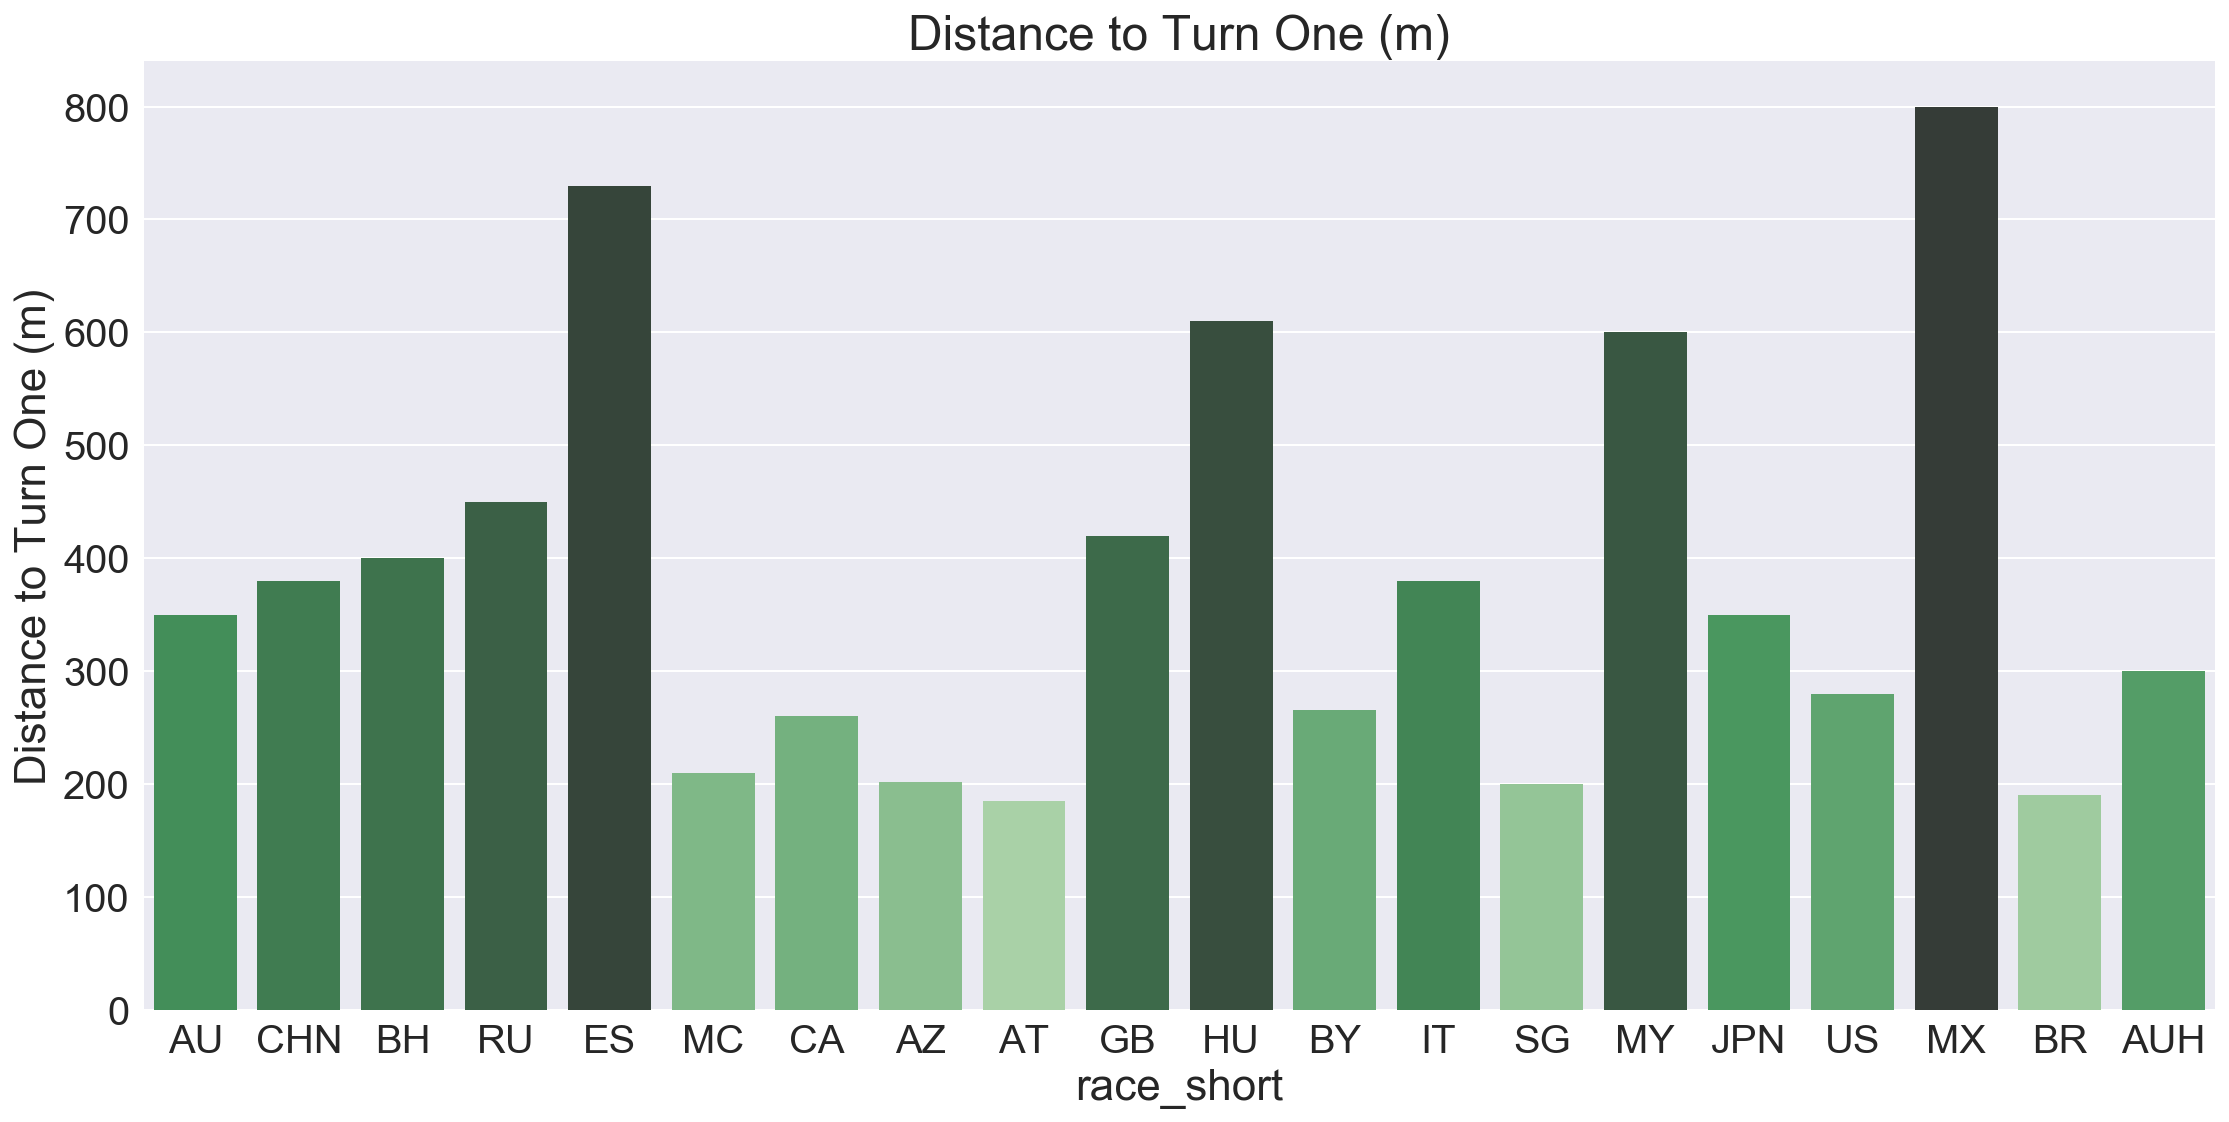

In [23]:
dist_to_turn1 = races_selected_features[races_selected_features['feature'] == "Distance to Turn One"]
plot_features(dist_to_turn1, "dist_to_turn1", "Distance to Turn One (m)") 

# Findings: No abnormalies, Mexico has the longest distance to turn one

#### 2) Longest Straight

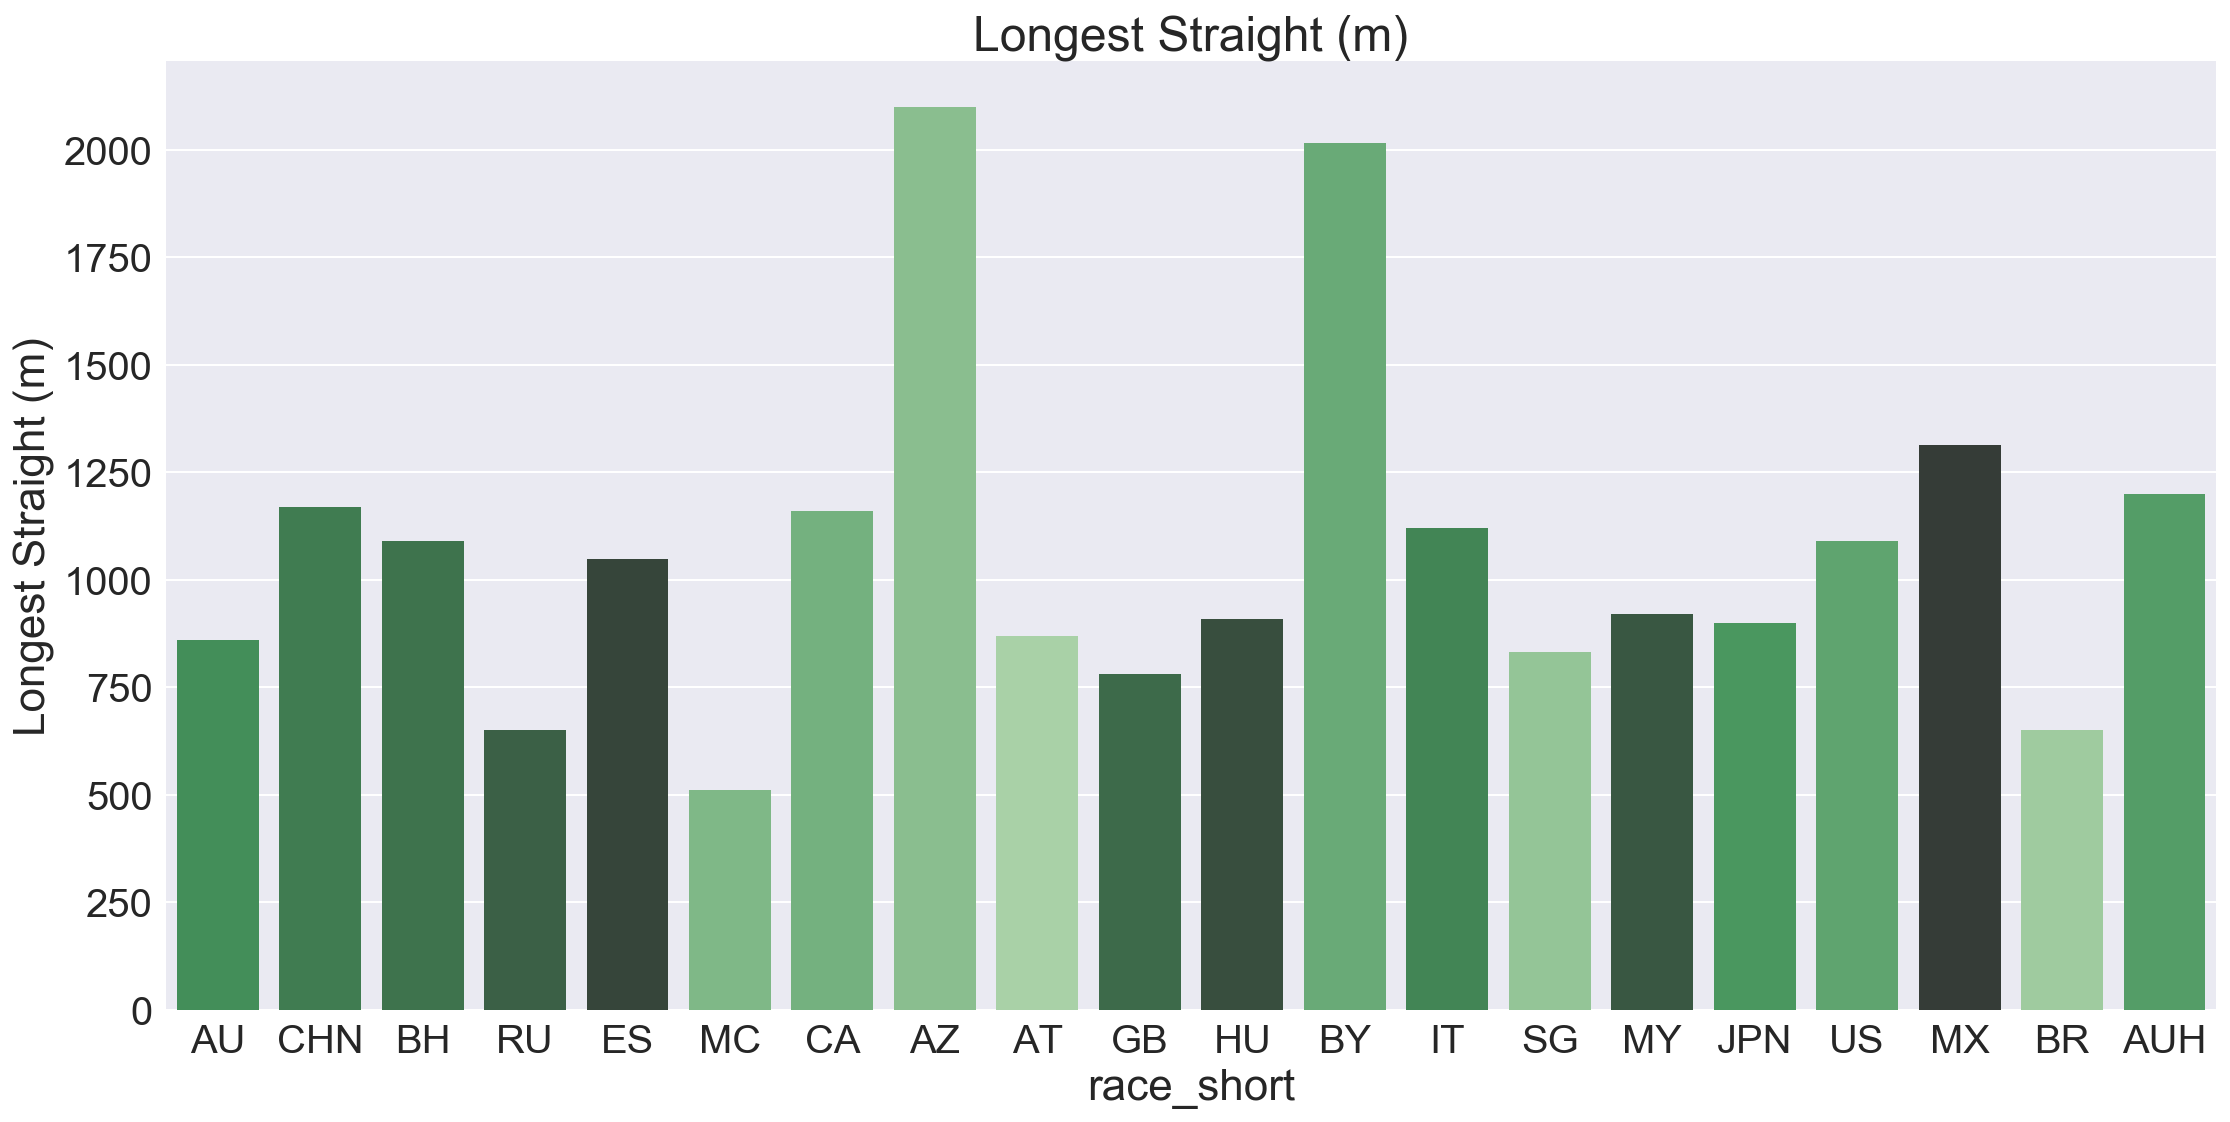

In [24]:
longest_straight = races_selected_features[races_selected_features['feature'] == "Longest straight"]
plot_features(longest_straight, "longest_straight", "Longest Straight (m)") 

#### 3) Top Speed

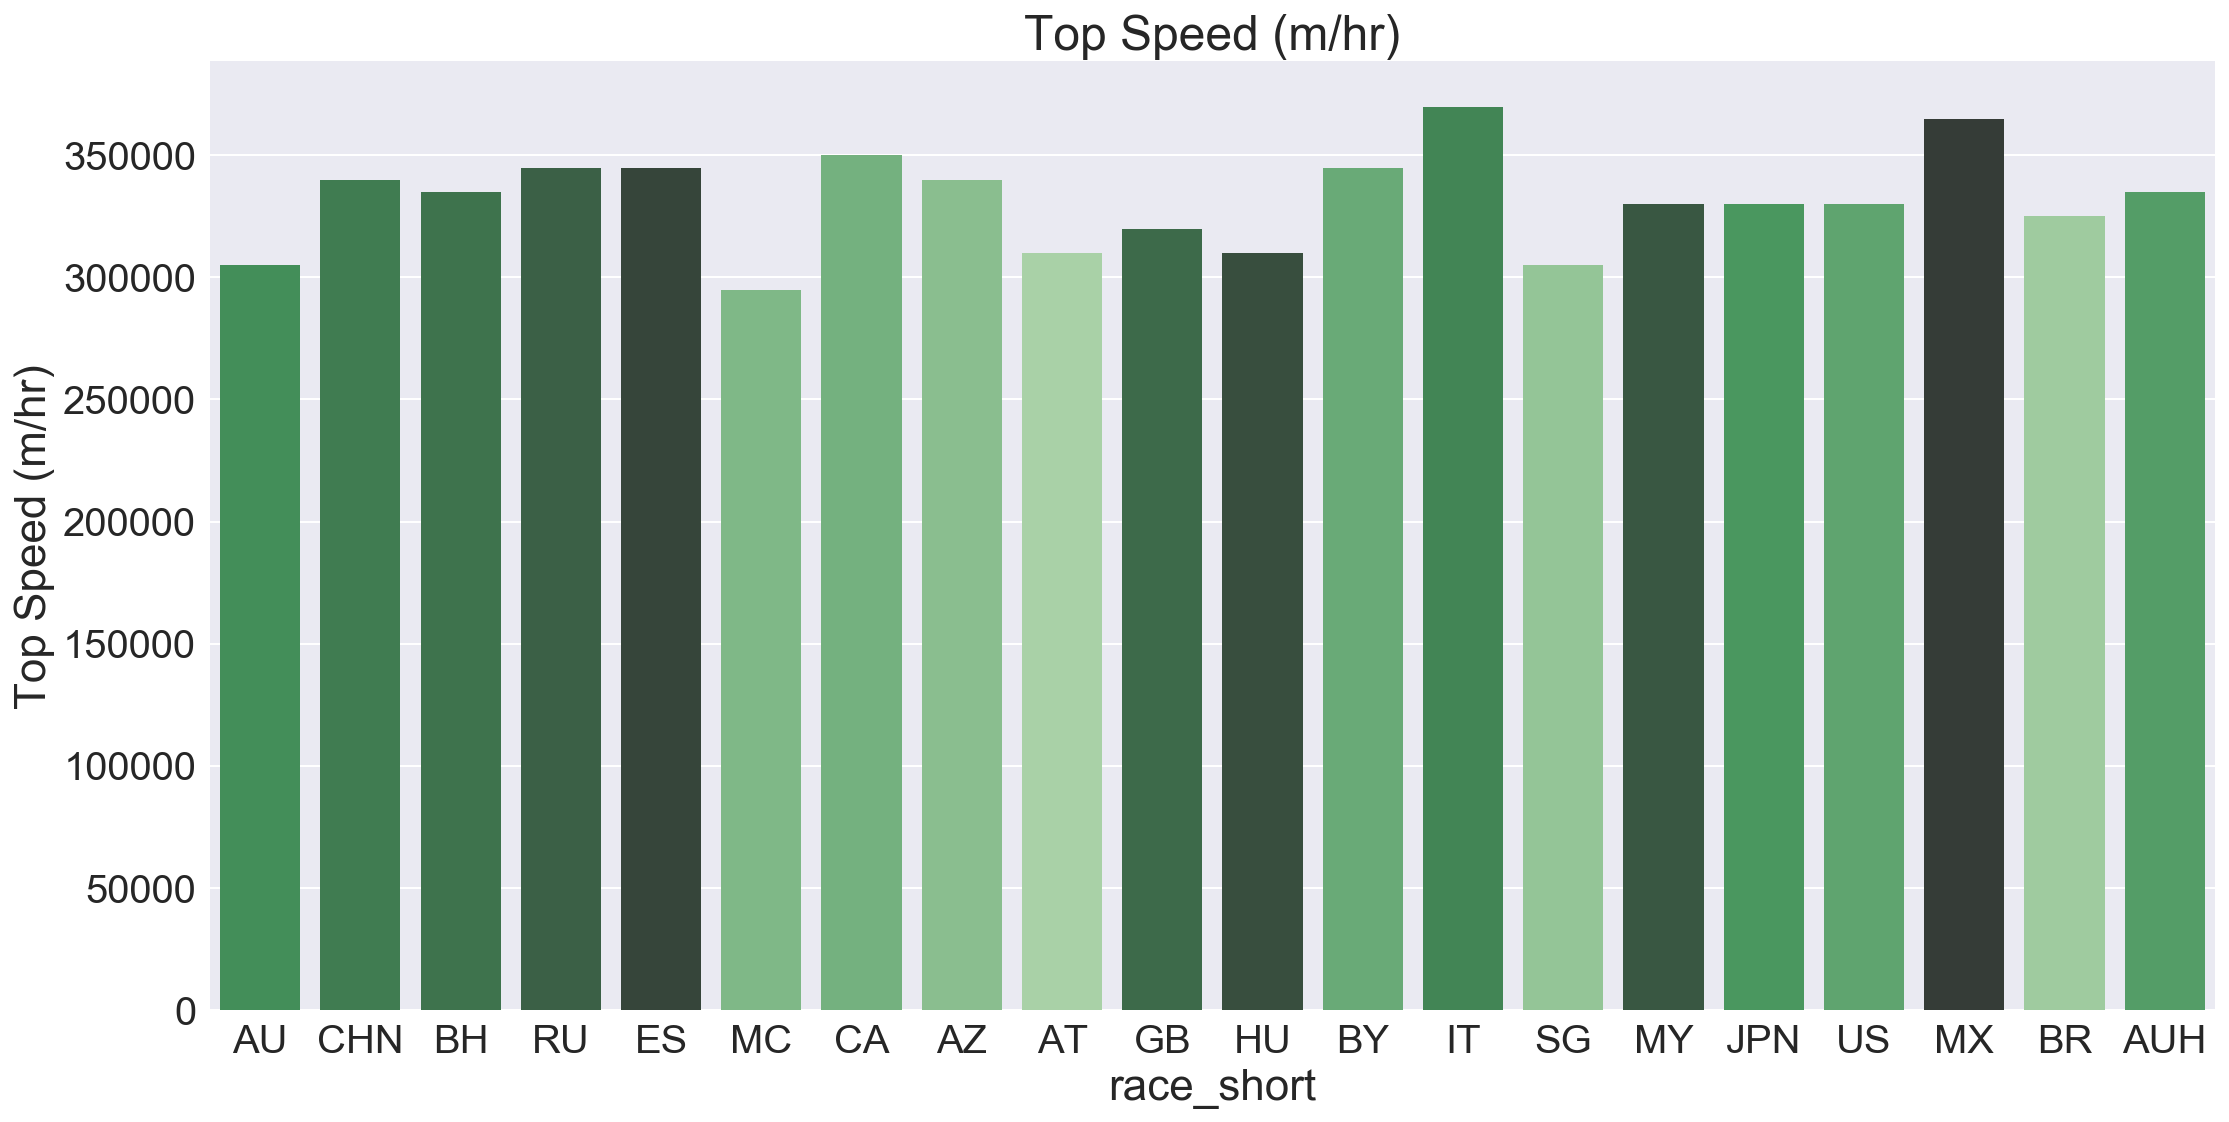

In [25]:
top_speed = races_selected_features[races_selected_features['feature'] == "Top speed"]
plot_features(top_speed, "top_speed", "Top Speed (m/hr)") 

#### 4) Full Throttle

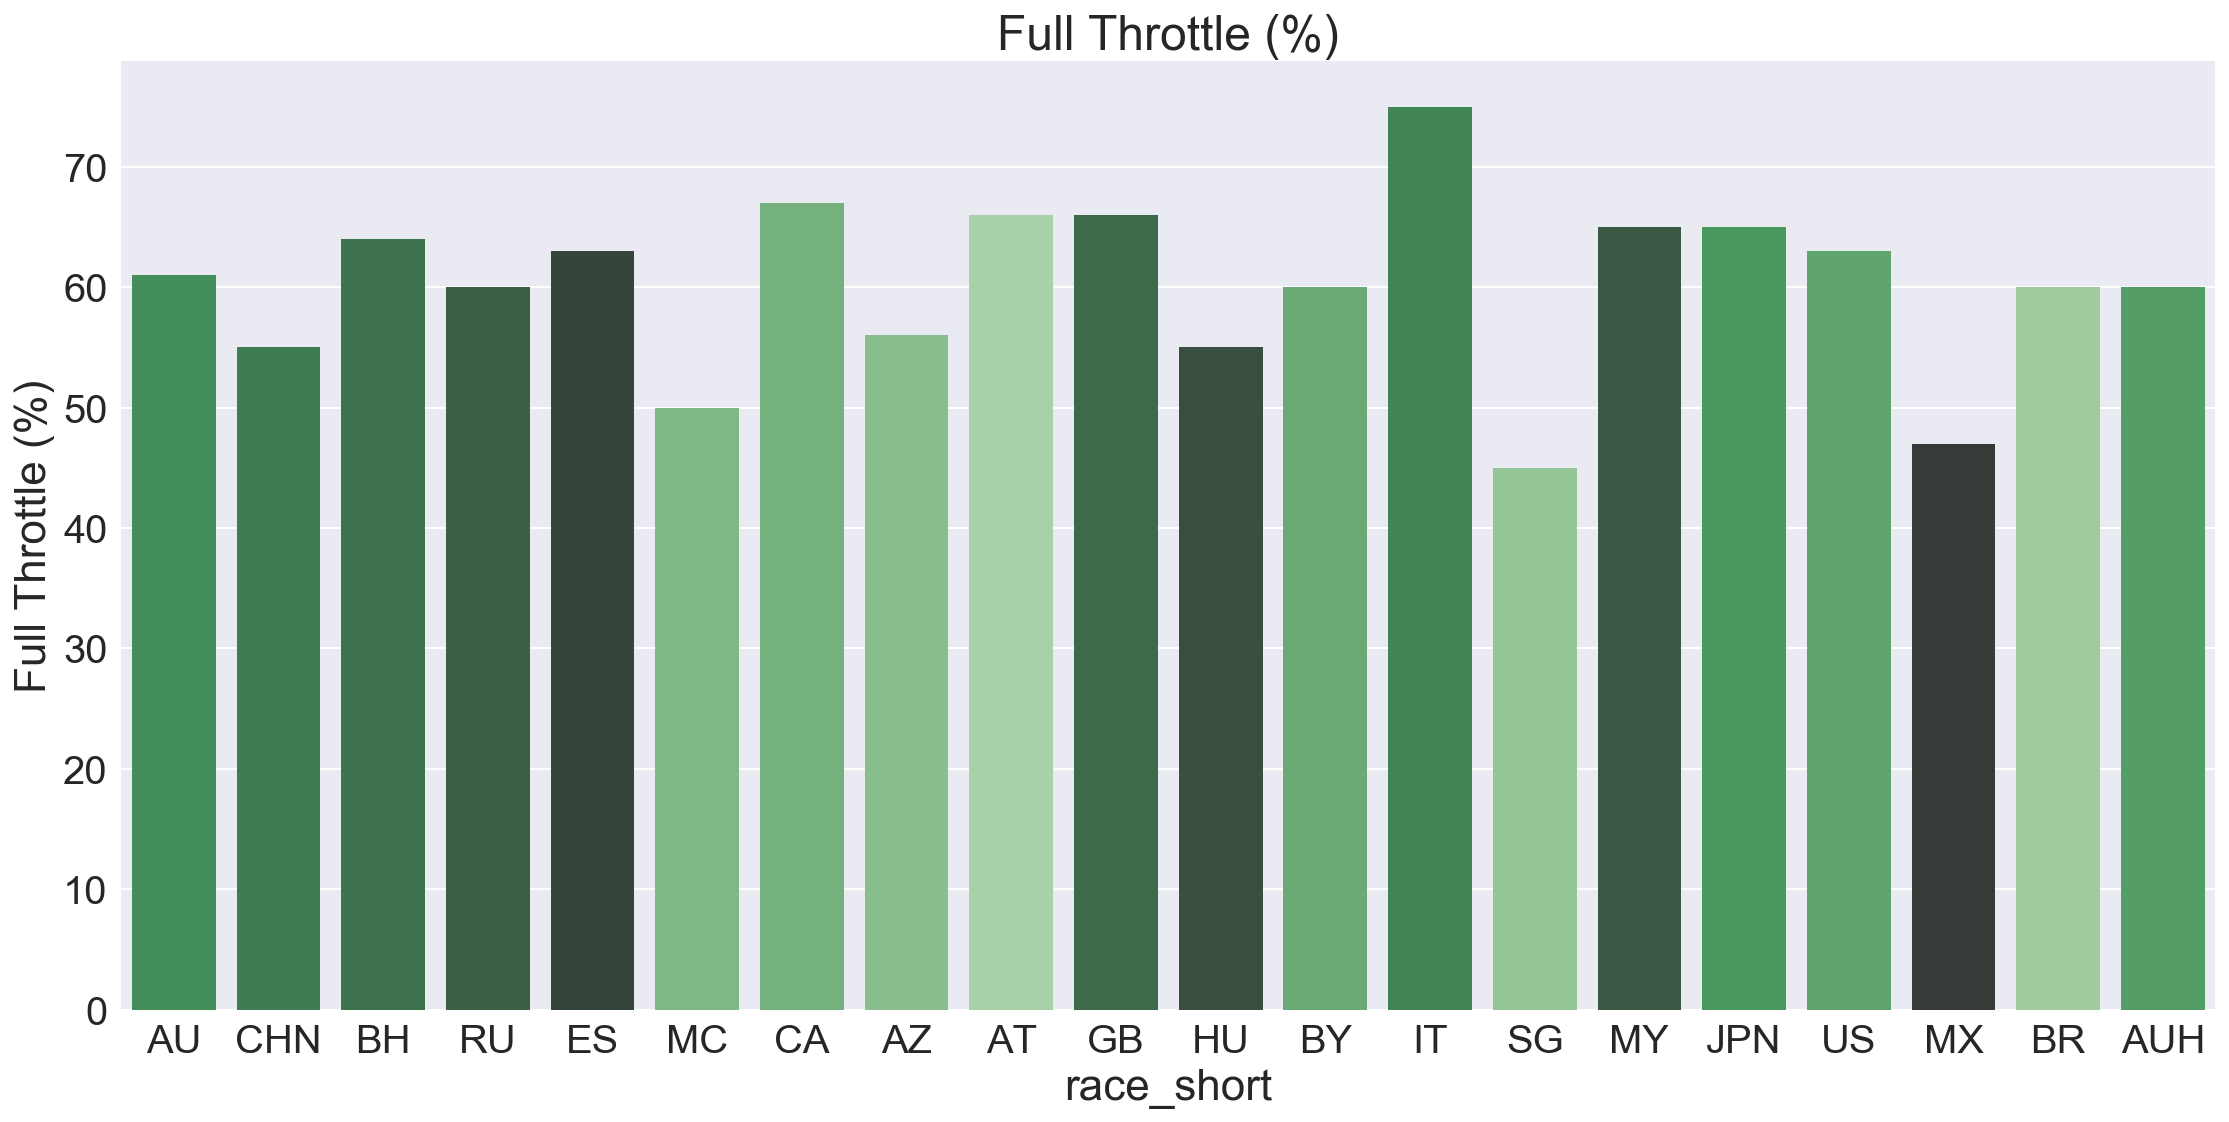

In [26]:
full_throttle = races_selected_features[races_selected_features['feature'] == "Full throttle"]
plot_features(full_throttle, "full_throttle", "Full Throttle (%)") 

#### 5) Fastest corner

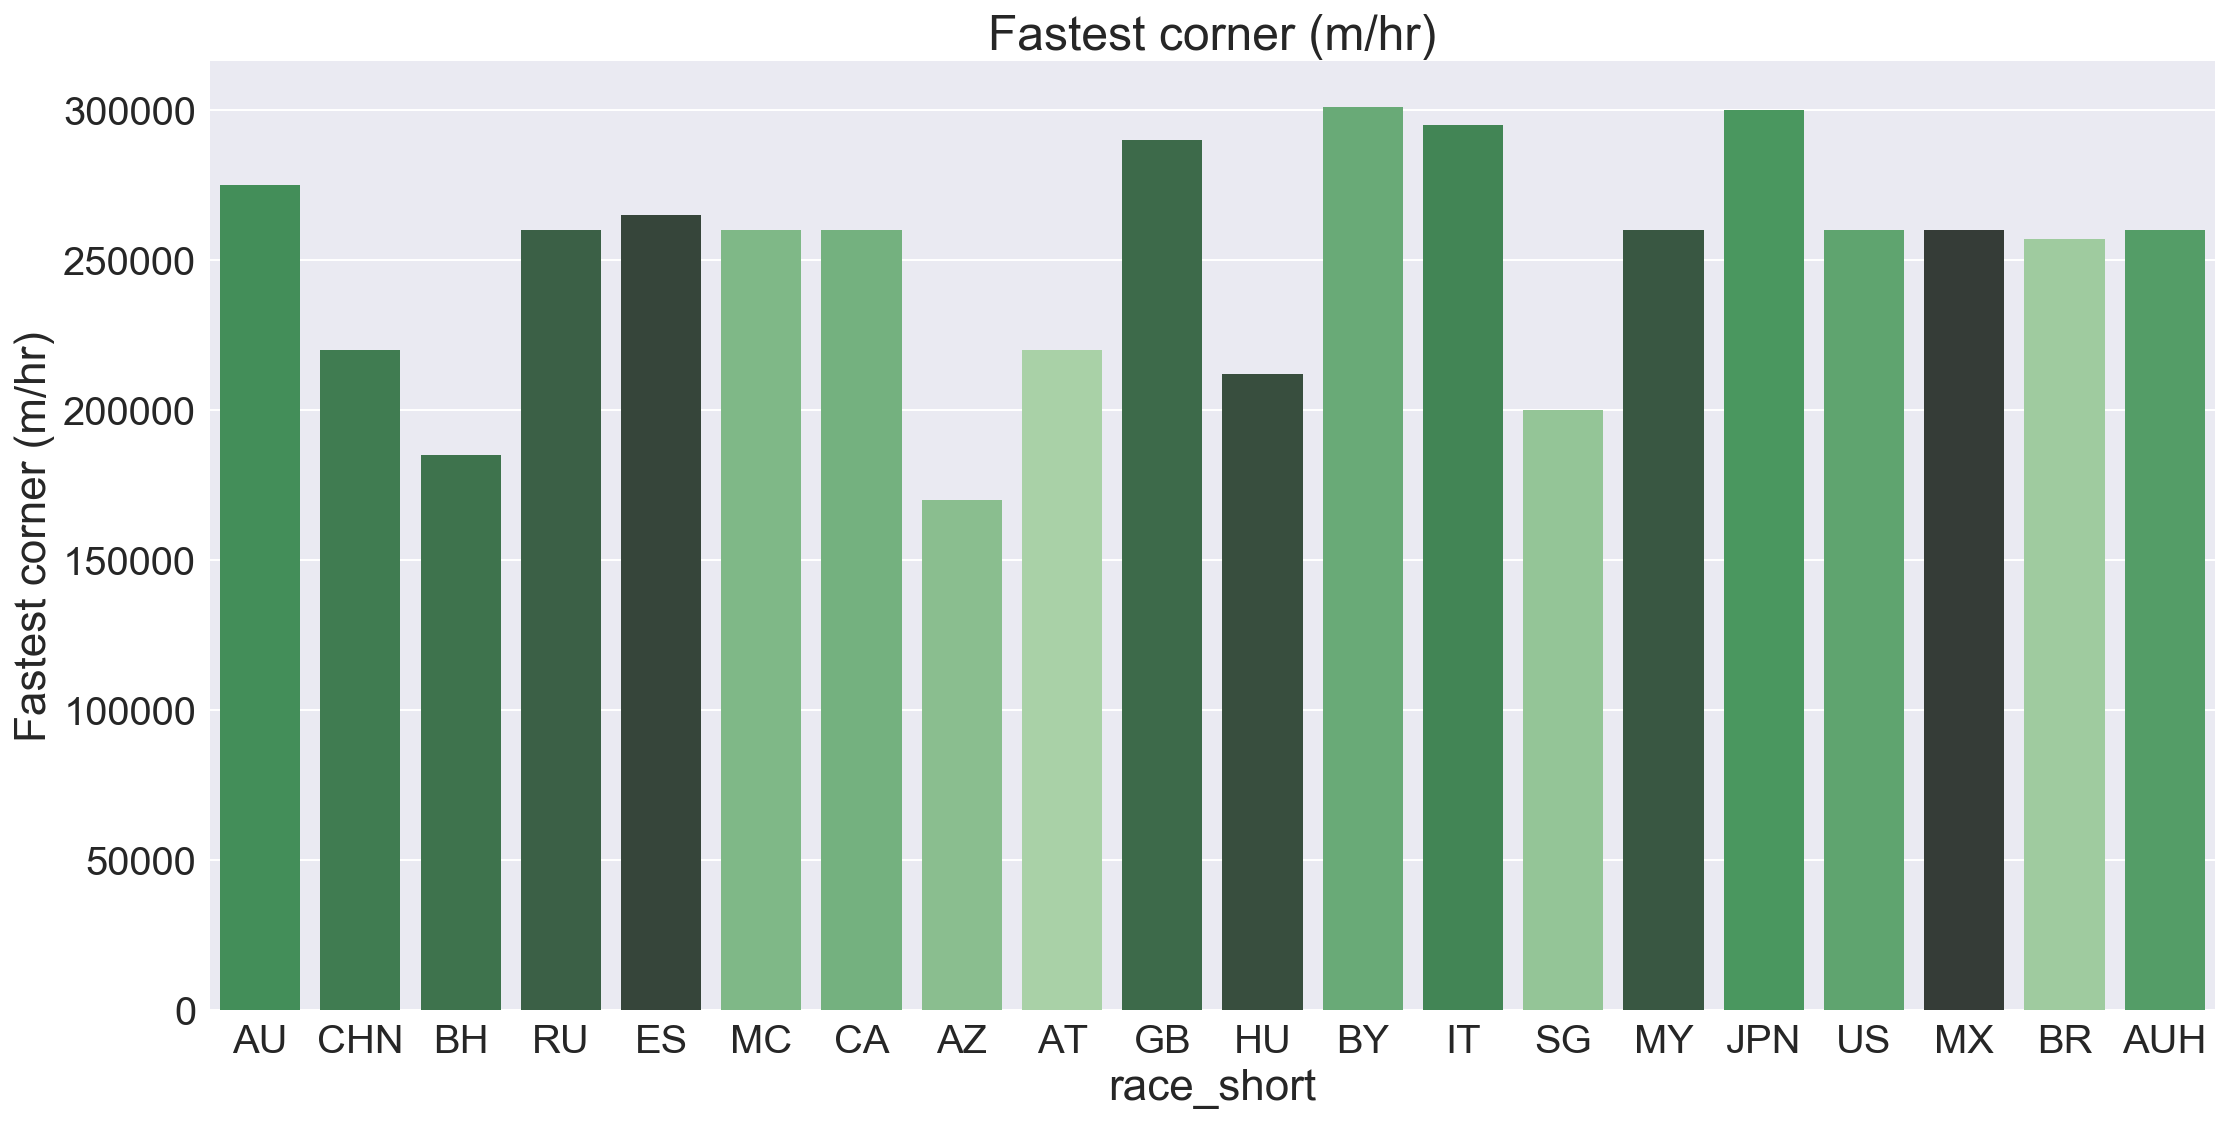

In [27]:
fastest_corner = races_selected_features[races_selected_features['feature'] == "Fastest corner"]
plot_features(fastest_corner, "fastest_corner", "Fastest corner (m/hr)") 

#### 6) Fuel Consumption

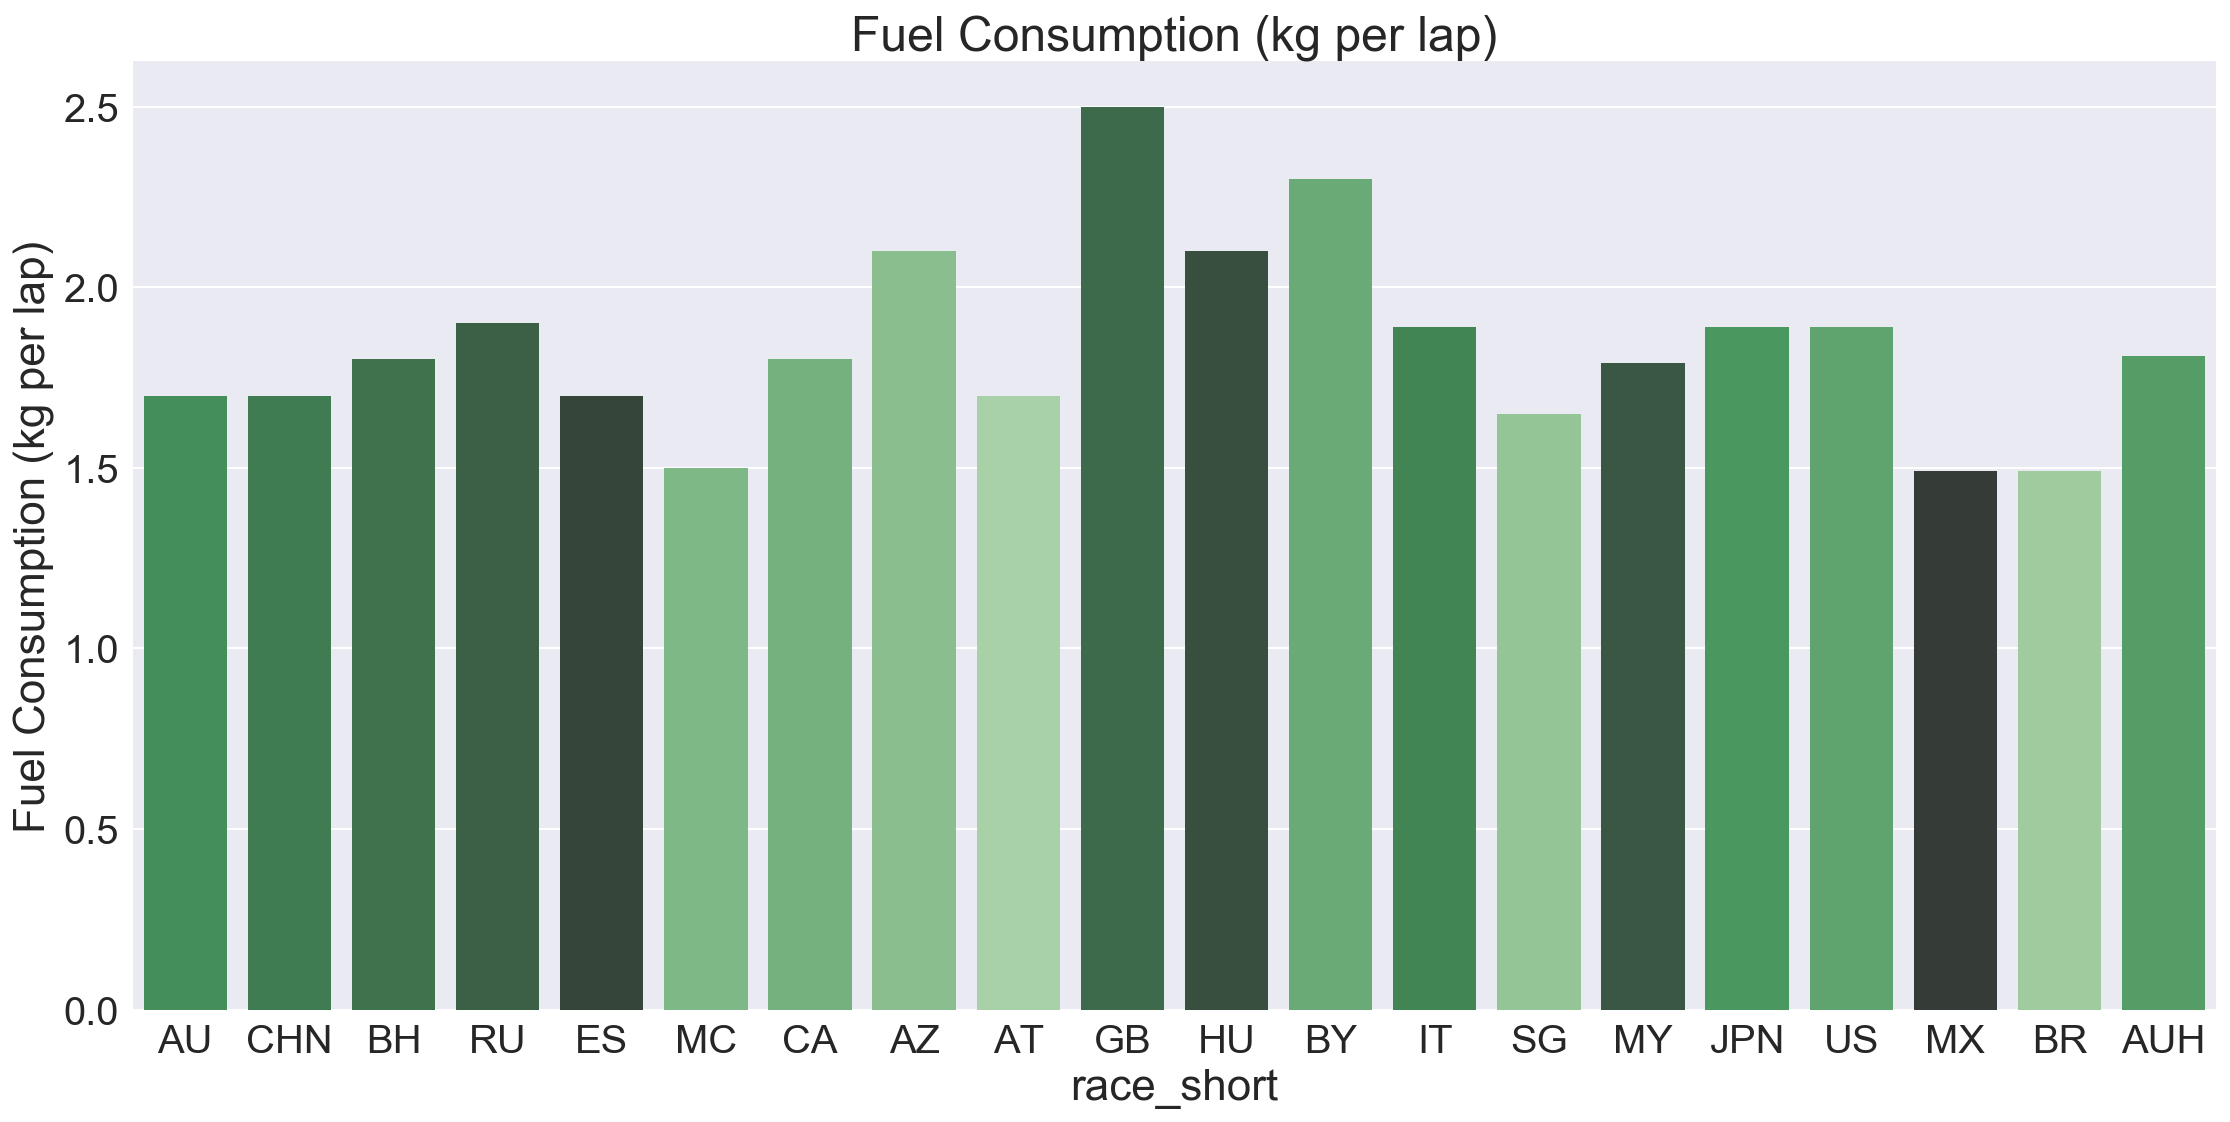

In [28]:
fuel_consumption = races_selected_features[races_selected_features['feature'] == "Fuel consumption"]
plot_features(fuel_consumption, "fuel_consumption", "Fuel Consumption (kg per lap)") 

#### 7) Gear Changes

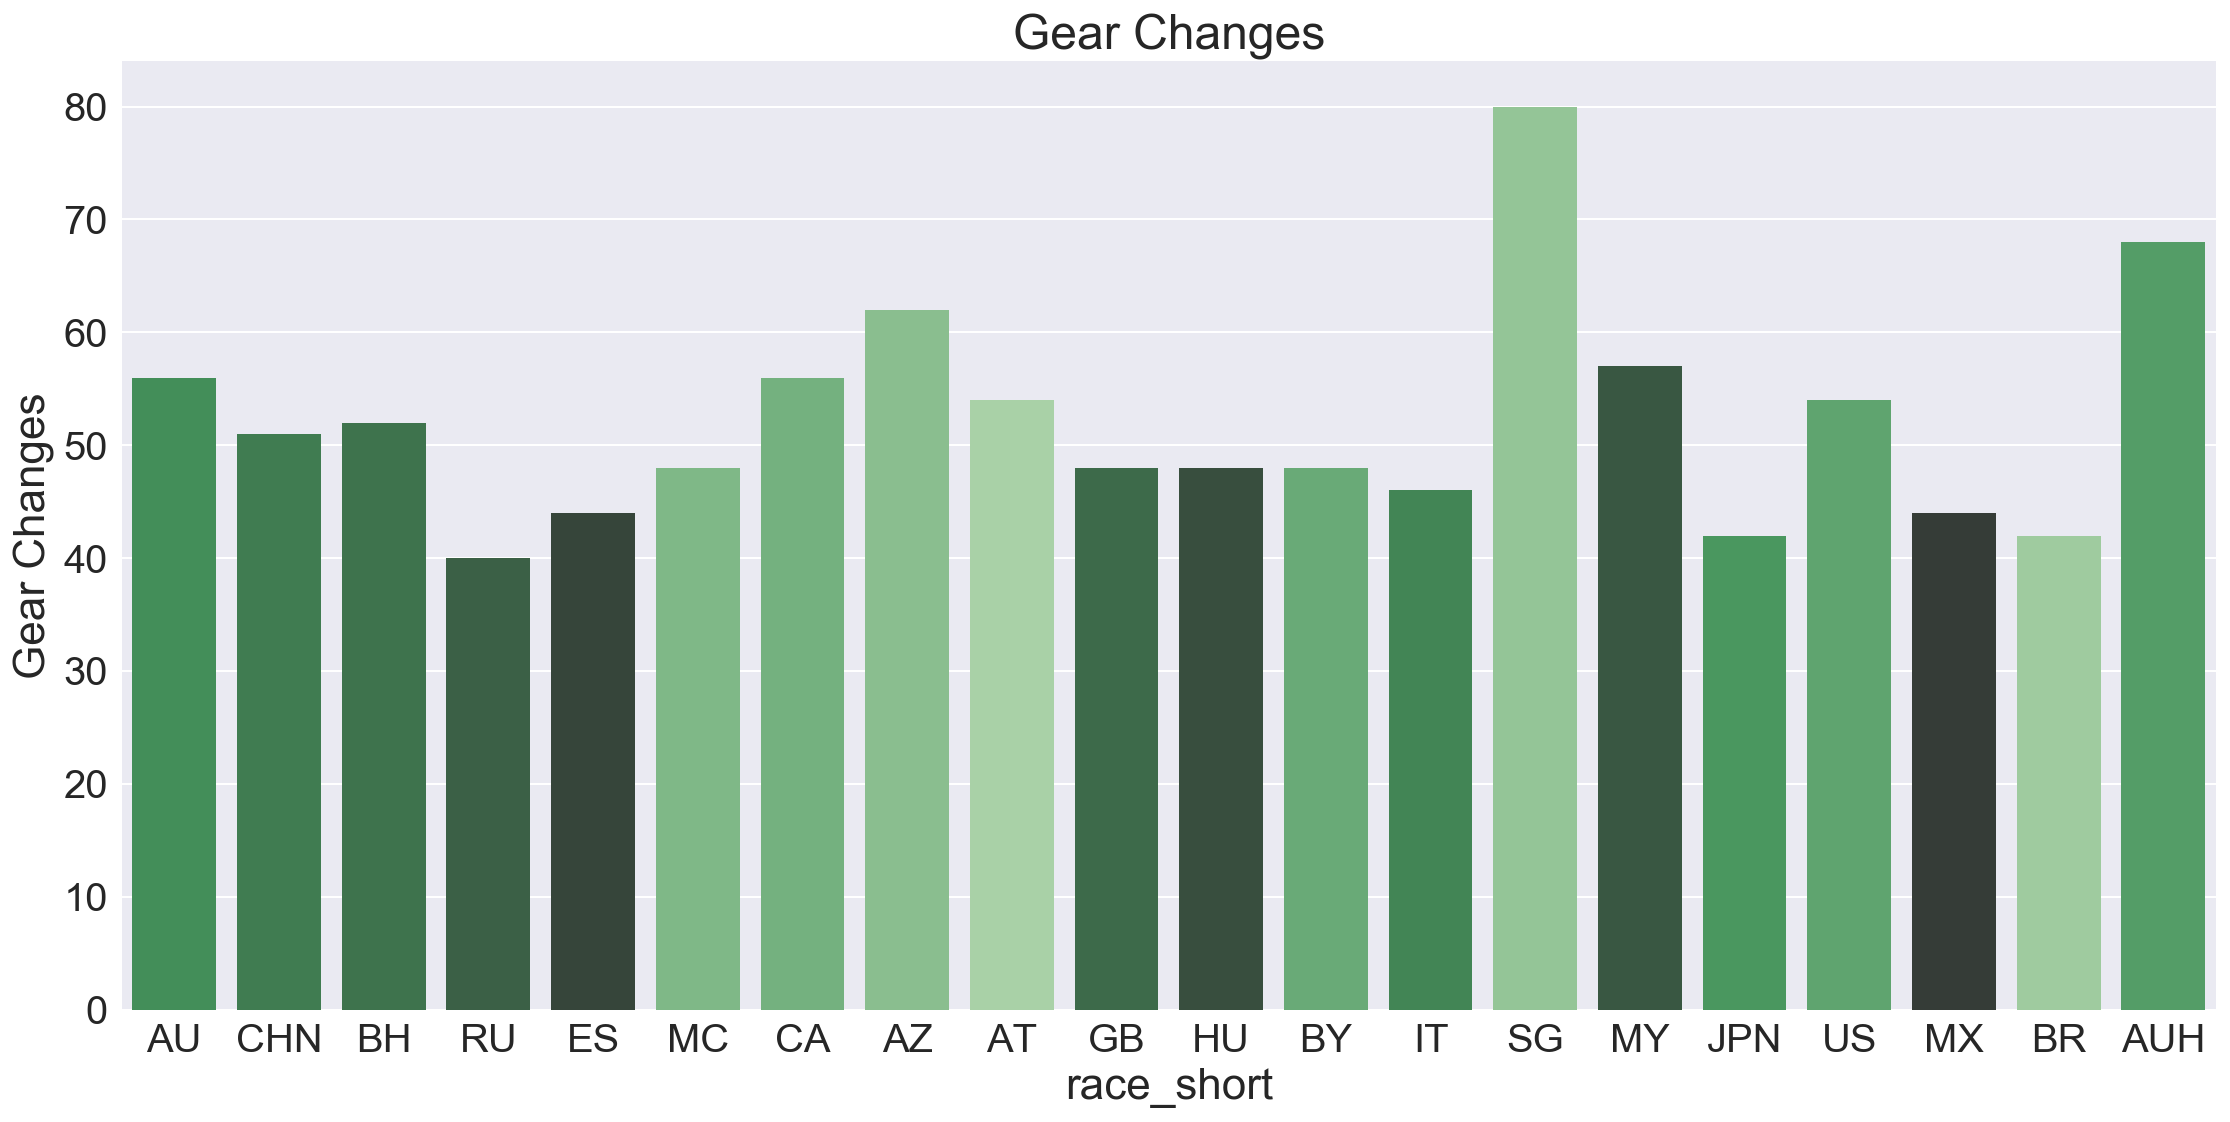

In [29]:
gear_changes = races_selected_features[races_selected_features['feature'] == "Gear changes"]
plot_features(gear_changes, "gear_changes", "Gear Changes") 

#### 8) ERS Demand

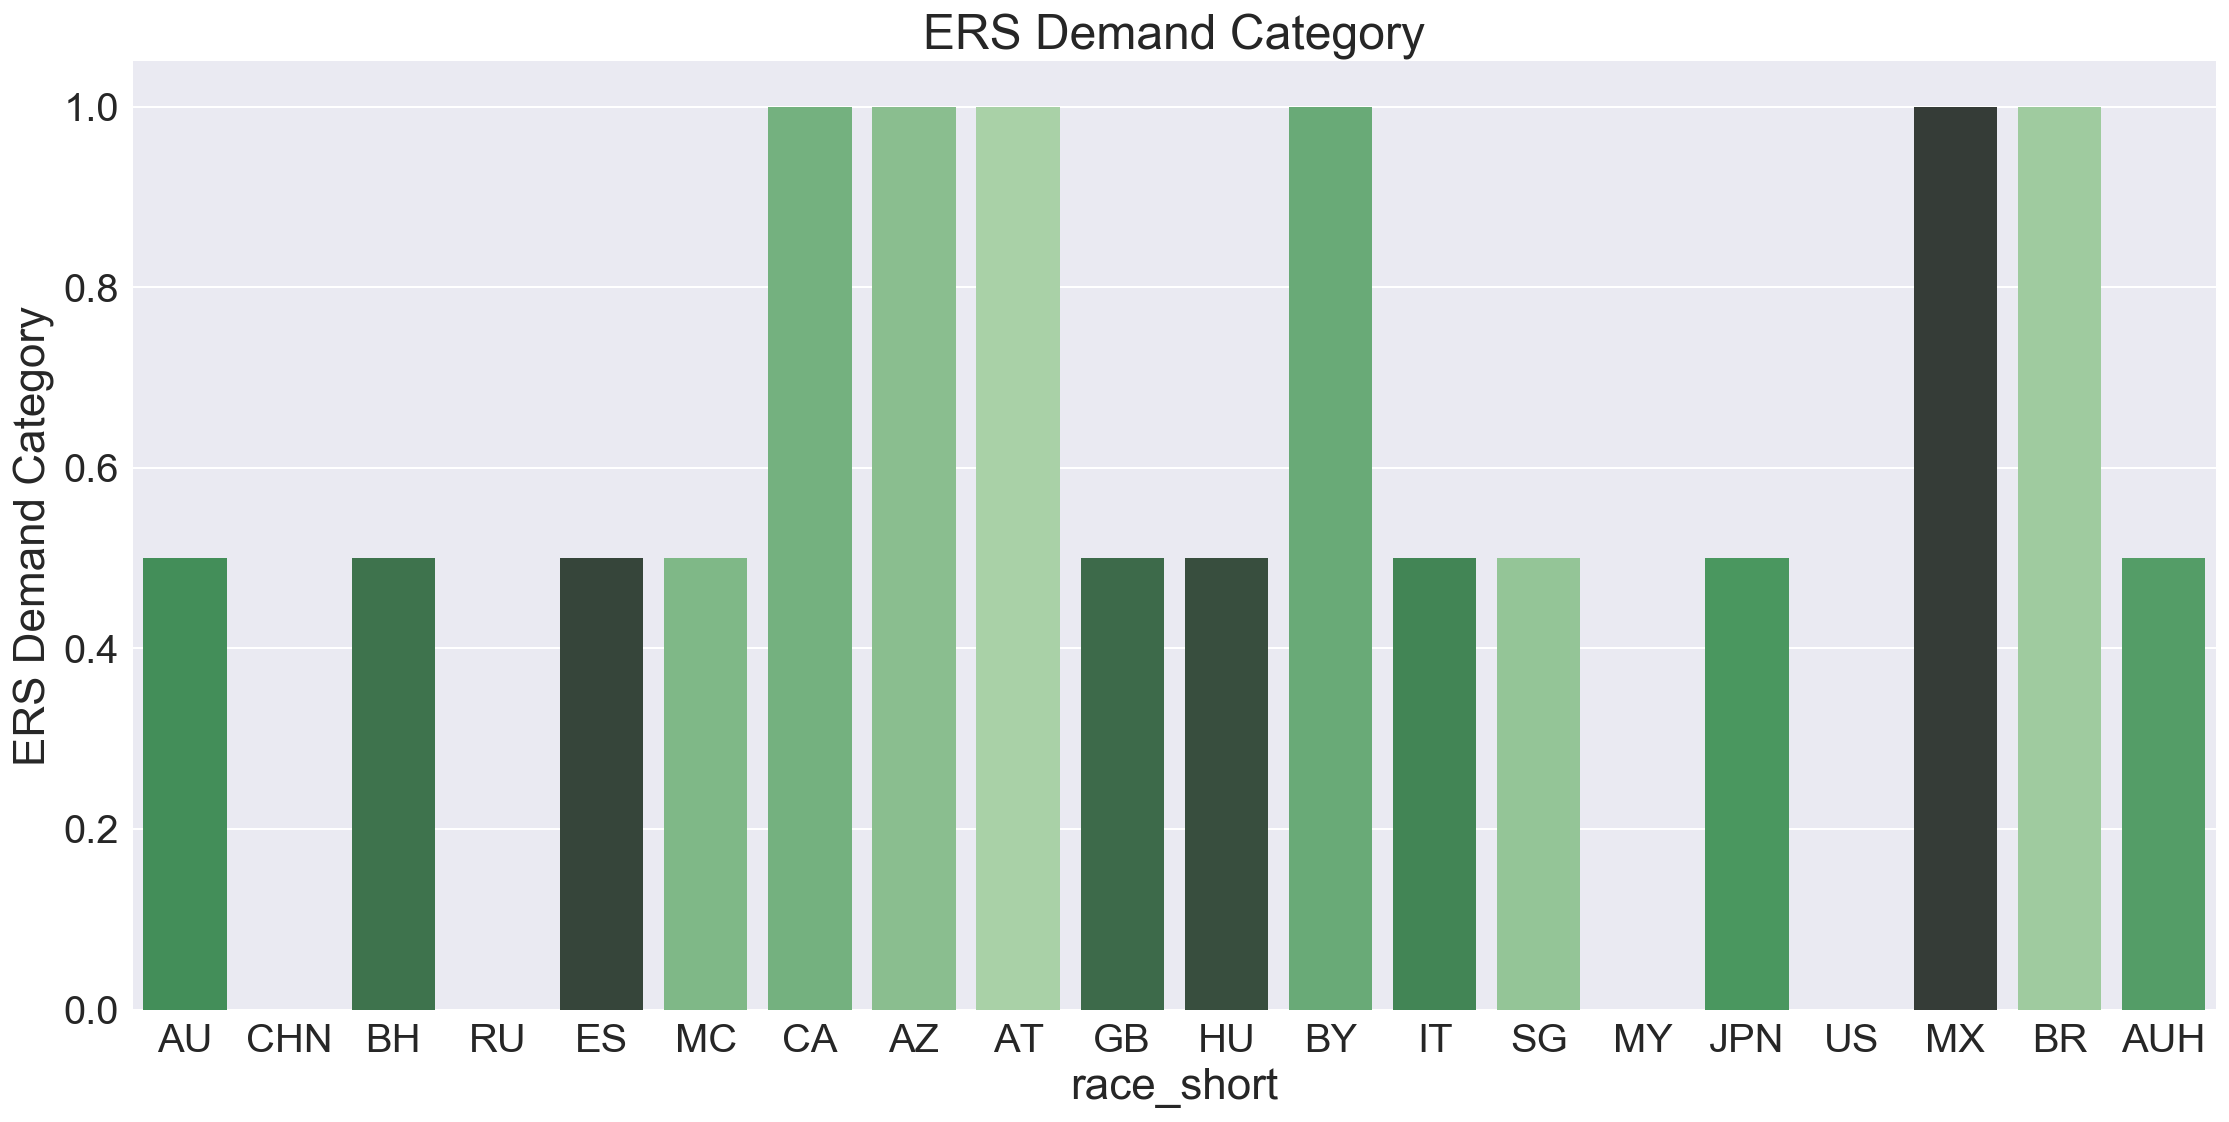

In [33]:
# US GP has a missing ERS demand value
ers_demand = races_selected_features[races_selected_features['feature'] == "ERS demands"].reset_index()
ers_demand.loc[16, 'label'] = 0
ers_demand.drop(['numbers'], axis=1, inplace=True)
ers_demand.rename(columns={'label': 'numbers'}, inplace=True)
plot_features(ers_demand, "ers_demand", "ERS Demand Category") 

#### 9) Brake Wear

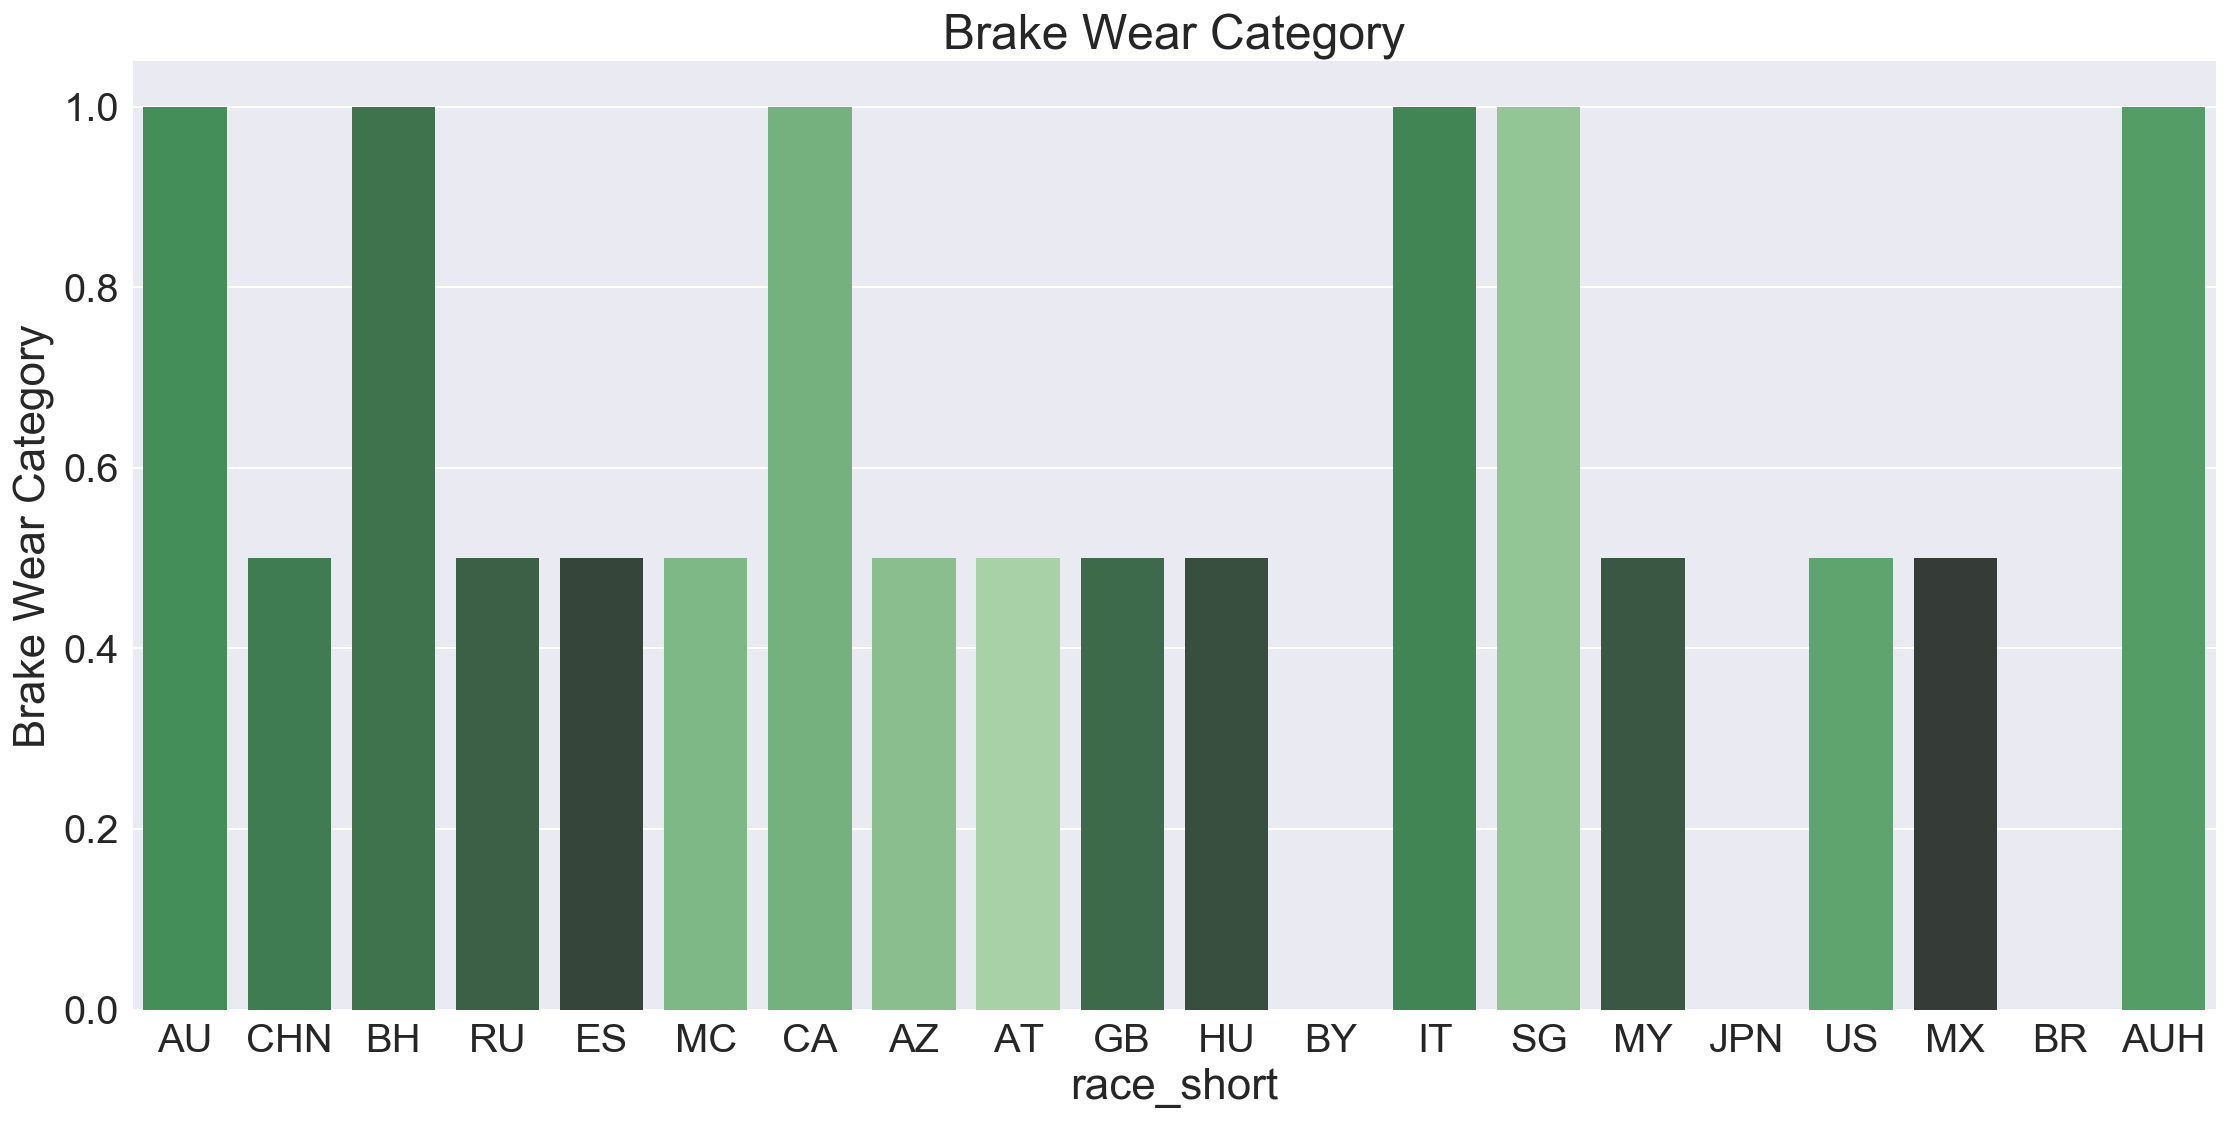

In [34]:
brake_wear = races_selected_features[races_selected_features['feature'] == "Brake wear"].reset_index()
brake_wear.drop(['numbers'], axis=1, inplace=True)
brake_wear.rename(columns={'label': 'numbers'}, inplace=True)
plot_features(brake_wear, "brake_wear", "Brake Wear Category") 

#### Concat the dataframes containing all the features

In [55]:
features = pd.concat([dist_to_turn1, longest_straight, top_speed, full_throttle, fastest_corner, fuel_consumption, \
                      gear_changes, ers_demand, brake_wear])[['feature', 'numbers', 'race']]
features.rename(columns={'race': 'name'}, inplace=True)

In [56]:
features['numbers'] = features['numbers'].astype(float)
featuresPT = pd.pivot_table(features, index=['name'], columns=['feature'], values=['numbers'])
featuresPT.columns = ["_".join((i,j)) for i,j in featuresPT.columns]
featuresPT = featuresPT.reset_index()
featuresPT = featuresPT.rename(columns = lambda x : str(x)[8:])
featuresPT.rename(columns={"": "name"}, inplace=True)

In [57]:
featuresPT.to_pickle(os.path.join(directory,  "featuresPT.pickle"))

In [58]:
featuresPT.head()

,name,Brake wear,Distance to Turn One,ERS demands,Fastest corner,Fuel consumption,Full throttle,Gear changes,Longest straight,Top speed
0,Abu Dhabi Grand Prix,1.0,300.0,0.5,260000.0,1.81,60.0,68.0,1200.0,335000.0
1,Australian Grand Prix,1.0,350.0,0.5,275000.0,1.70,61.0,56.0,860.0,305000.0
2,Austrian Grand Prix,0.5,185.0,1.0,220000.0,1.70,66.0,54.0,868.0,310000.0
3,Azerbaijan Grand Prix,0.5,202.0,1.0,170000.0,2.10,56.0,62.0,2100.0,340000.0
4,Bahrain Grand Prix,1.0,400.0,0.5,185000.0,1.80,64.0,52.0,1090.0,335000.0


#### Additional Features: Track Characteristics

In [39]:
xl = pd.ExcelFile("./formula-1-race-data/Track_Information.xlsx", encoding='utf-8')
xl.sheet_names
track_info = xl.parse("Copy of Sheet12")
track_info.rename(columns={"Race": "name"}, inplace=True)

In [128]:
features = pd.merge(featuresPT, track_info, on='name', how='left')

In [129]:
features.isnull().sum()

name                    0
Brake wear              0
Distance to Turn One    0
ERS demands             0
Fastest corner          0
Fuel consumption        0
Full throttle           0
Gear changes            0
Longest straight        0
Top speed               0
Tyre stress             0
Downforce               0
Lateral                 0
Asphalt Grip            0
Asphalt Abrasion        0
Number of laps          0
Circuit length (km)     0
dtype: int64

In [146]:
features.shape

(20, 17)

In [210]:
X = features.drop(['name'], axis=1)
Y = features['name']

In [208]:
def plot_silhouette_score(X):

    range_n_clusters = [2, 3, 4, 5, 6]

    for n_clusters in range_n_clusters:

        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1
        ax1.set_xlim([-0.1, 1])

        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

For n_clusters = 2 The average silhouette_score is : 0.540197825154


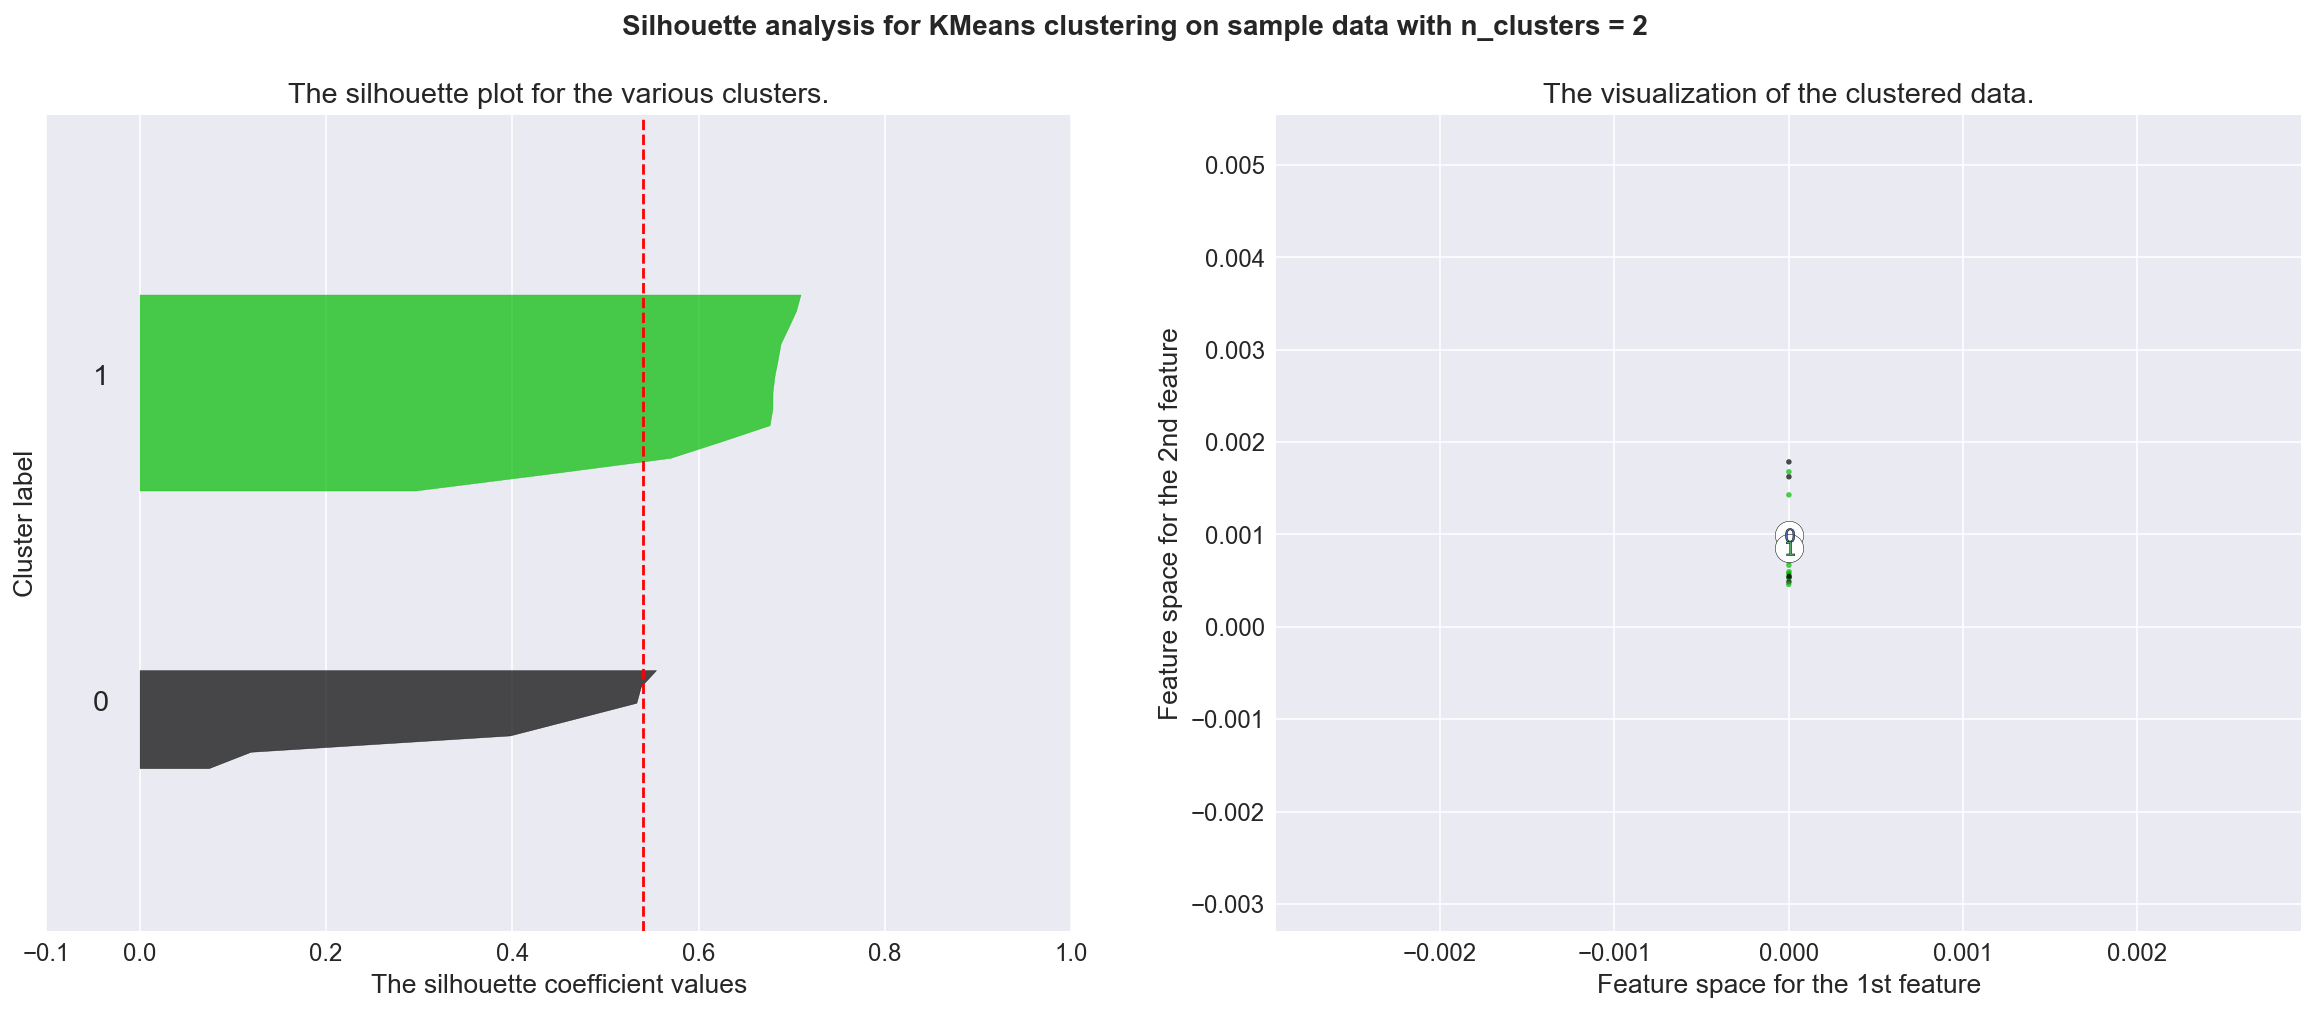

For n_clusters = 3 The average silhouette_score is : 0.616210346845


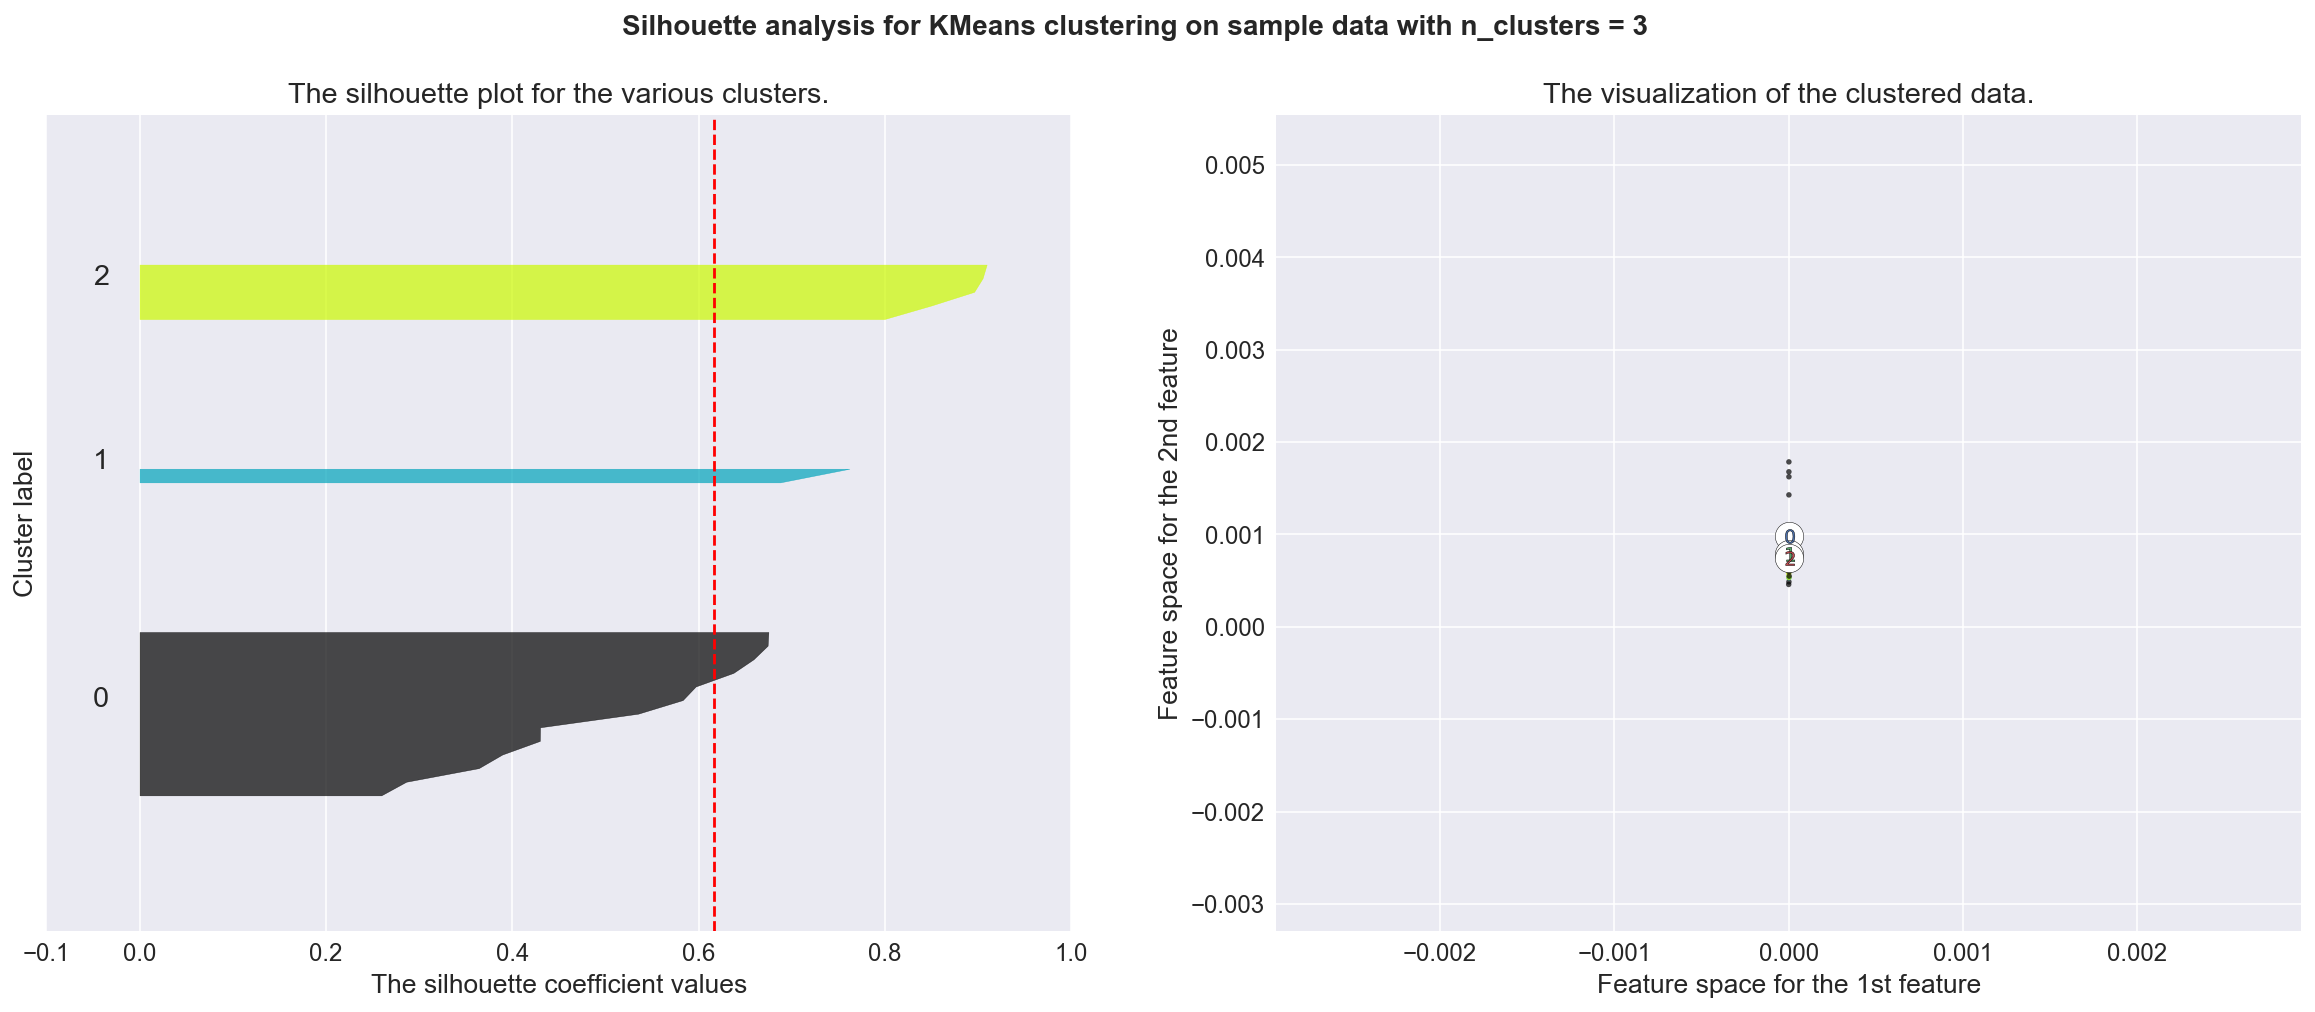

For n_clusters = 4 The average silhouette_score is : 0.695835168541


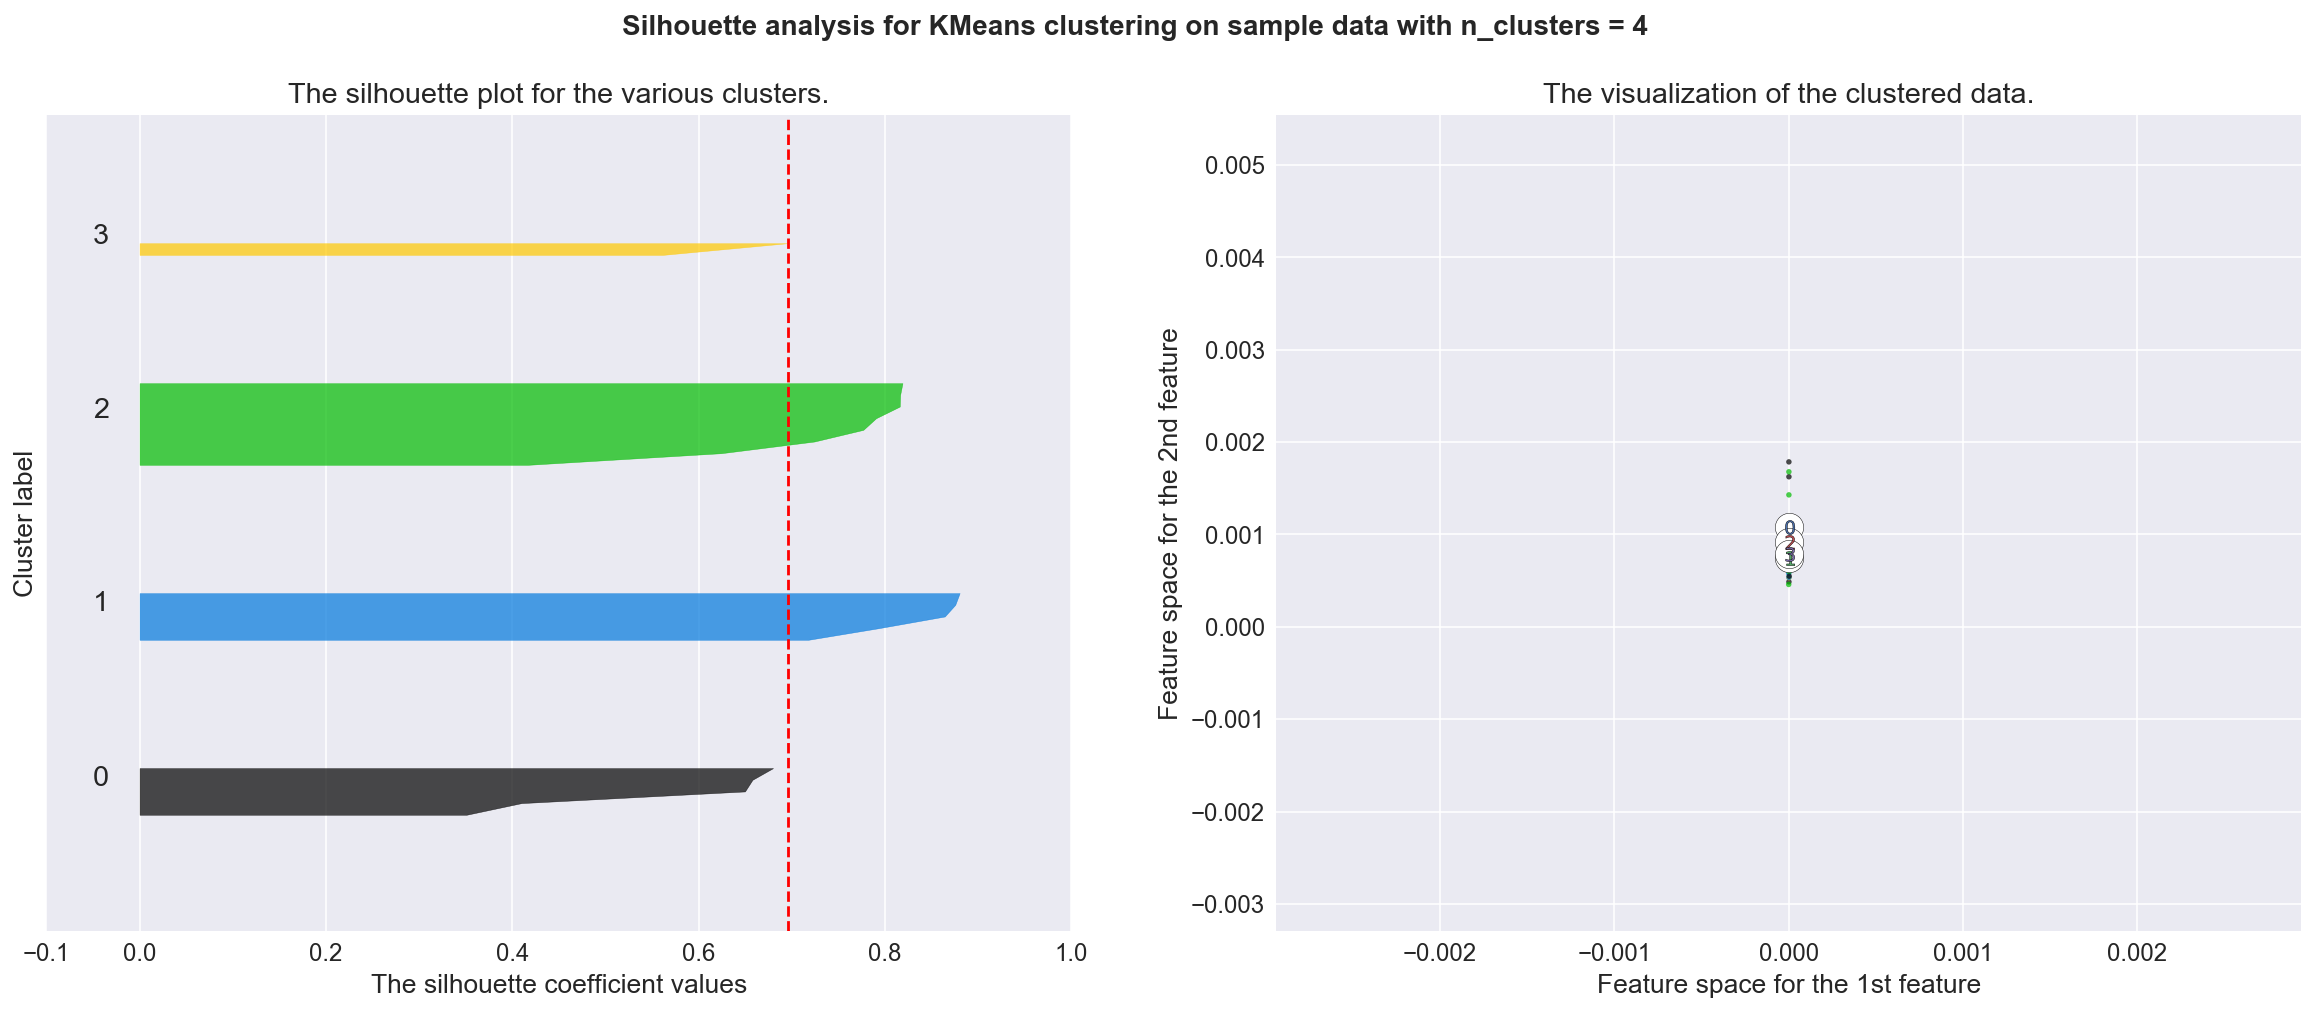

For n_clusters = 5 The average silhouette_score is : 0.633521188339


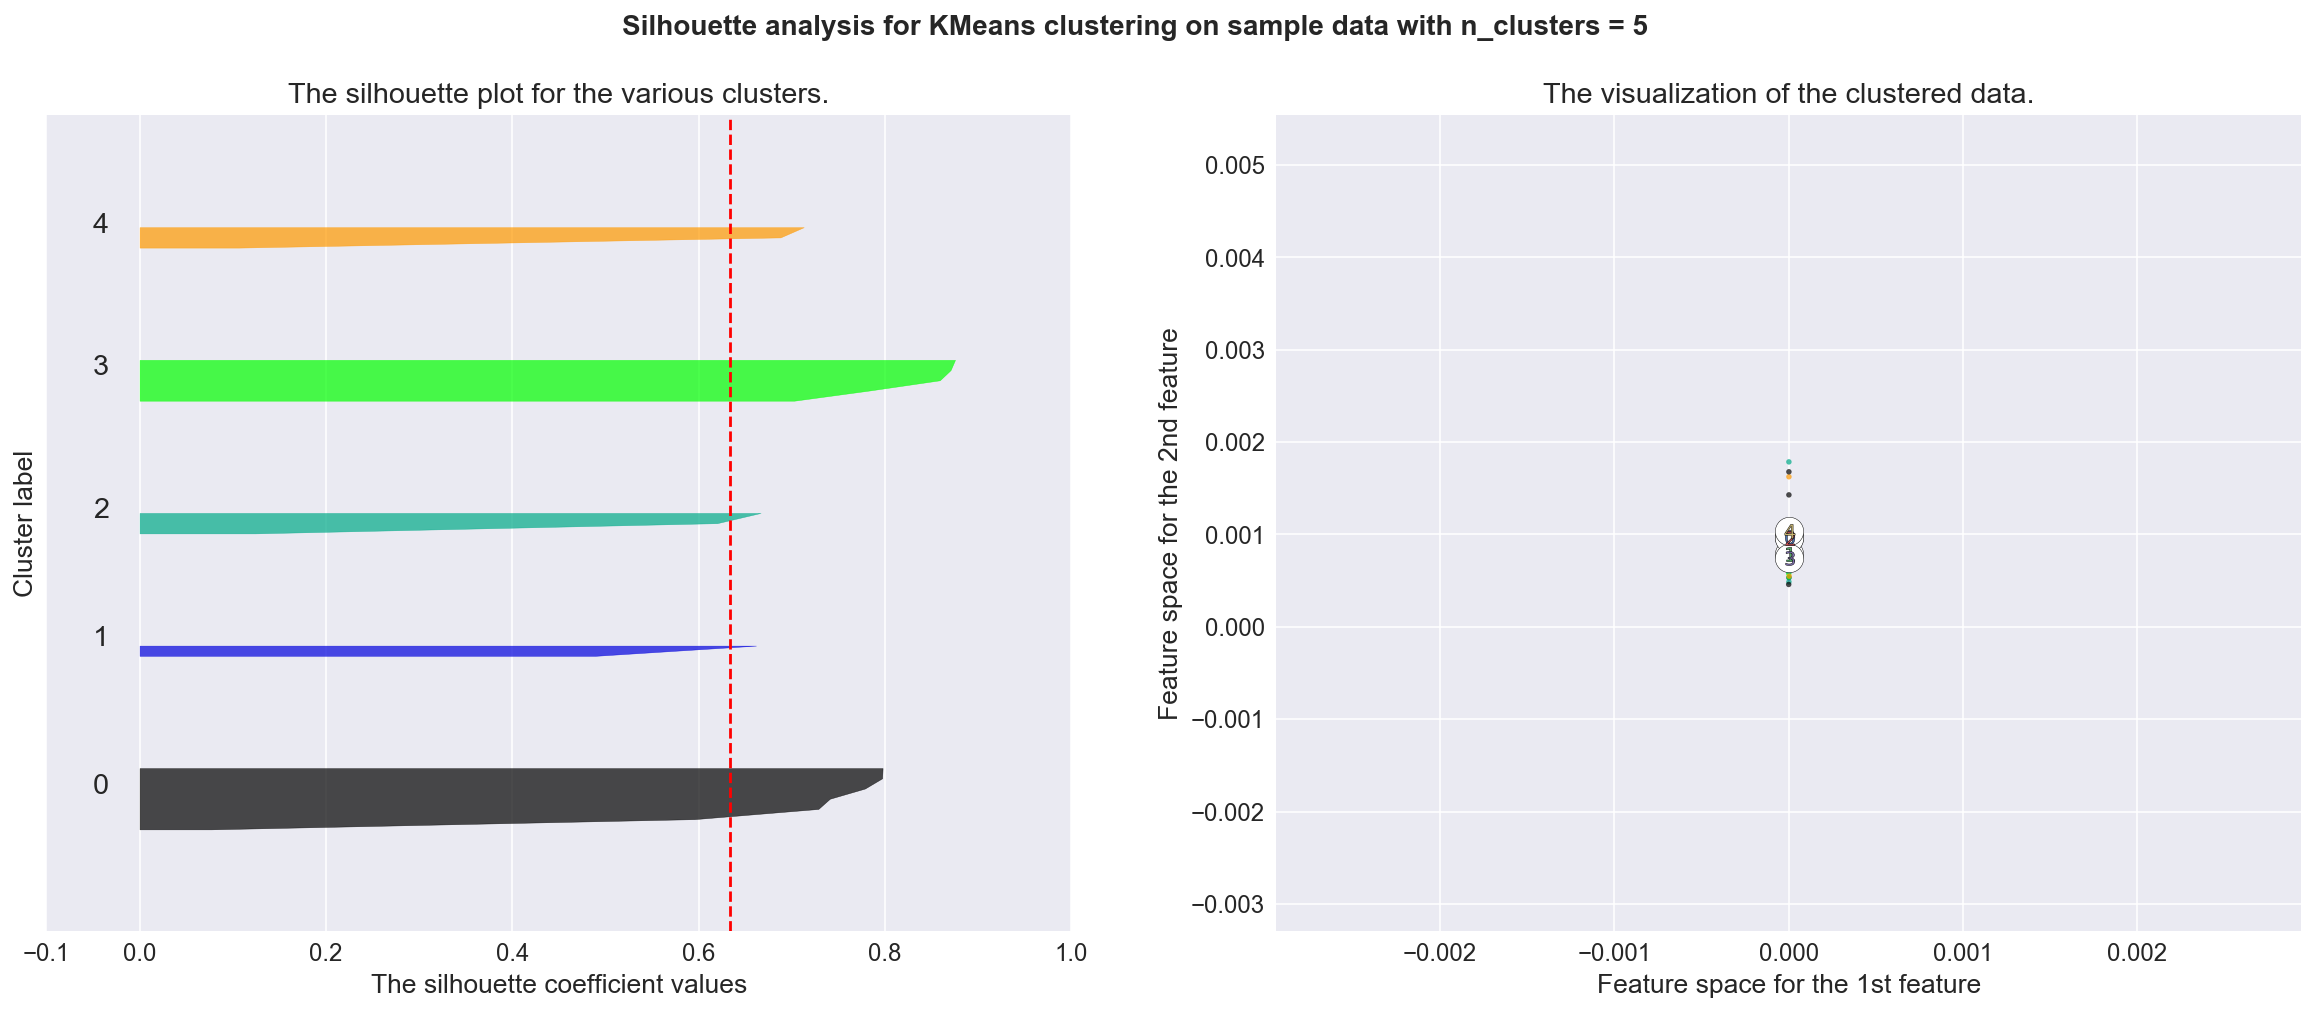

For n_clusters = 6 The average silhouette_score is : 0.576009222725


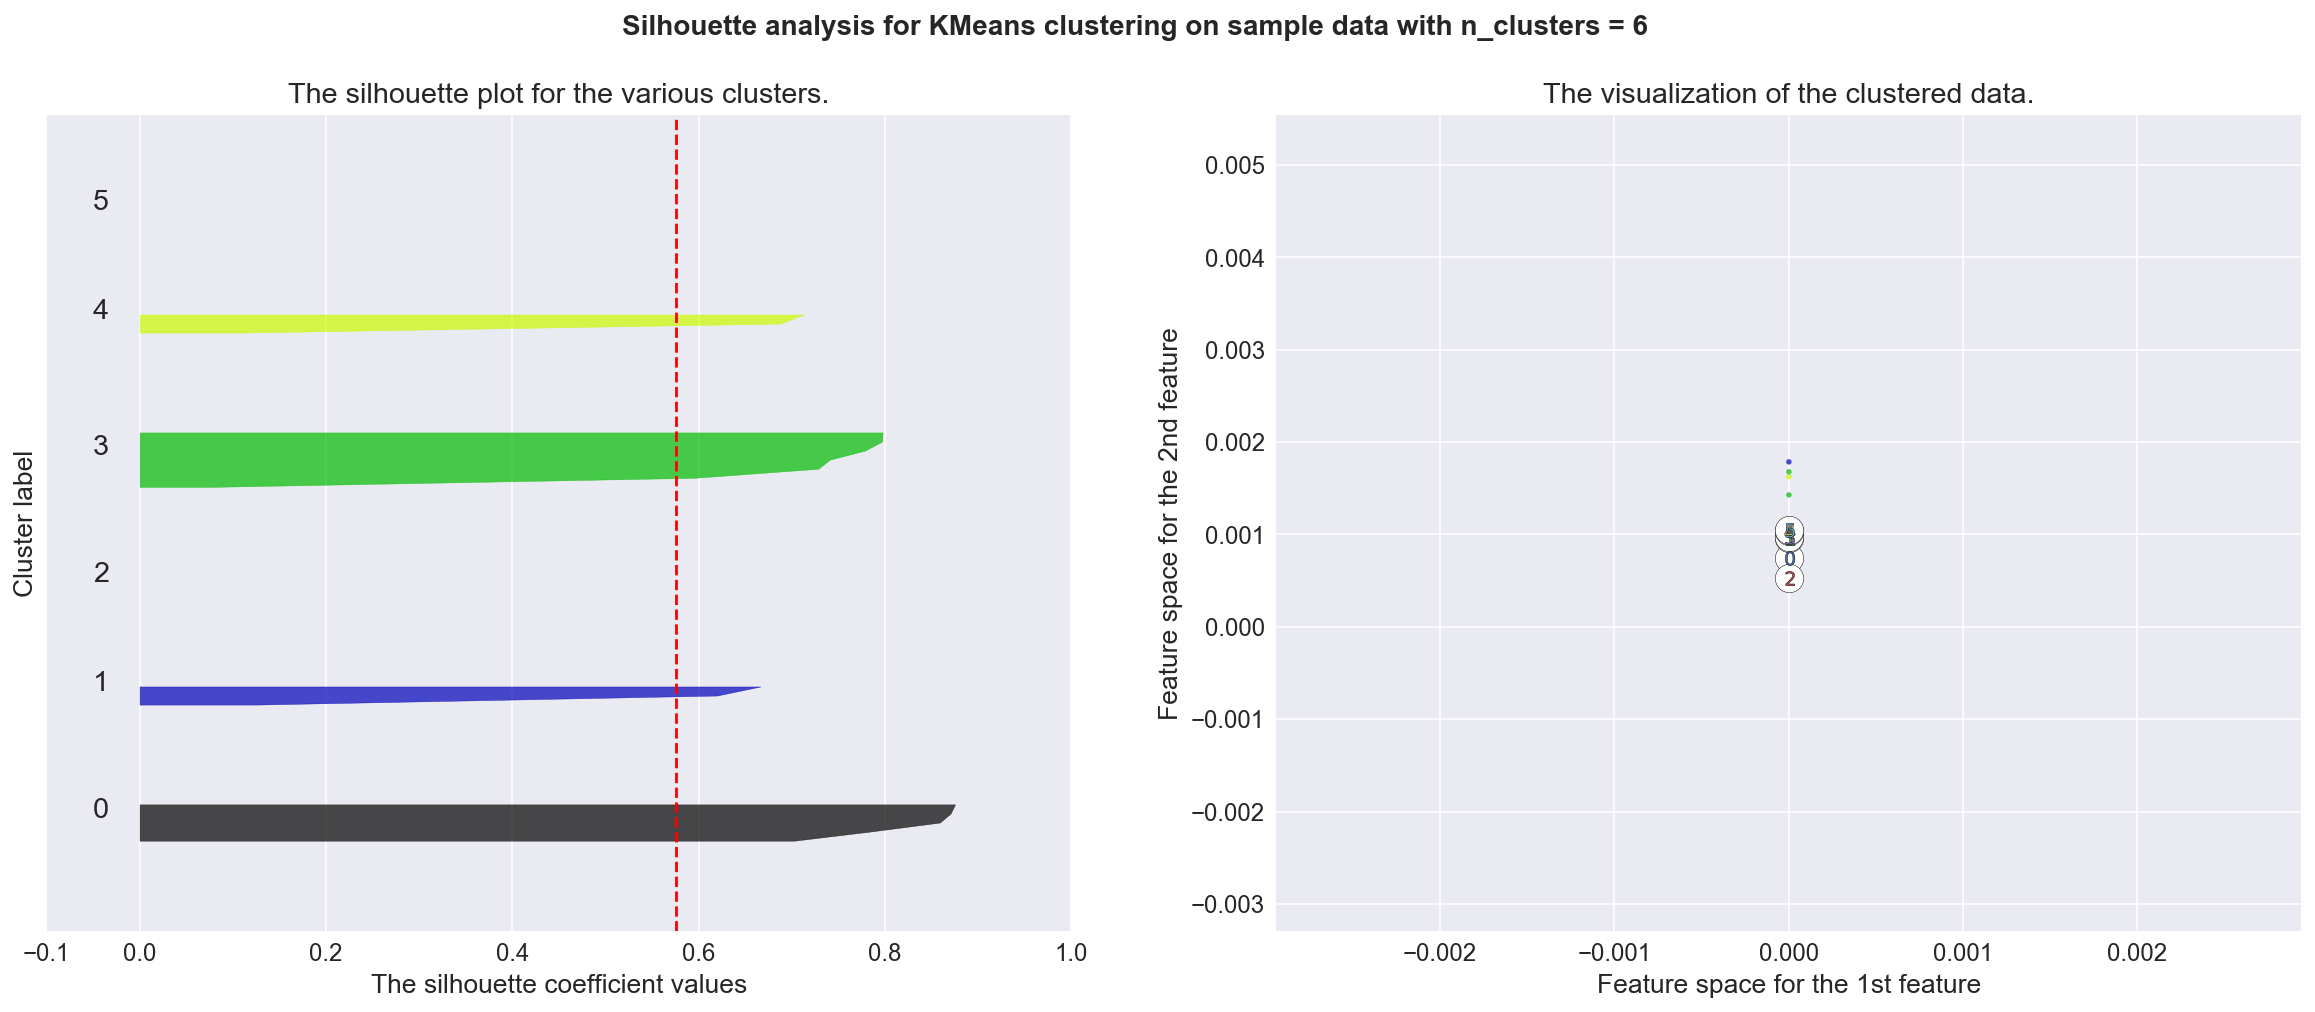

In [211]:
Xn = normalize(X)
plot_silhouette_score(Xn)

#### RESULTS: Cluster groupings of race tracks based on track information 

In [212]:
k_mean_opt = KMeans(n_clusters=4)
k_mean_opt.fit(Xn)
labels_opt = k_mean_opt.labels_

X_opt = features
X_opt['clusters']=labels_opt
X_opt

,name,Brake wear,Distance to Turn One,ERS demands,Fastest corner,Fuel consumption,Full throttle,Gear changes,Longest straight,Top speed,Tyre stress,Downforce,Lateral,Asphalt Grip,Asphalt Abrasion,Number of laps,Circuit length (km),clusters
0,Abu Dhabi Grand Prix,1.0,300.0,0.5,260000.0,1.81,60.0,68.0,1200.0,335000.0,2,3,3,2,2,55,5554,0
1,Australian Grand Prix,1.0,350.0,0.5,275000.0,1.70,61.0,56.0,860.0,305000.0,1,4,1,1,3,58,5303,2
2,Austrian Grand Prix,0.5,185.0,1.0,220000.0,1.70,66.0,54.0,868.0,310000.0,2,3,3,2,1,71,4318,3
3,Azerbaijan Grand Prix,0.5,202.0,1.0,170000.0,2.10,56.0,62.0,2100.0,340000.0,3,2,2,4,1,51,6003,1
4,Bahrain Grand Prix,1.0,400.0,0.5,185000.0,1.80,64.0,52.0,1090.0,335000.0,3,3,3,4,5,57,5412,1
5,Belgian Grand Prix,0.0,265.0,1.0,301000.0,2.30,60.0,48.0,2015.0,345000.0,5,2,4,4,3,44,7004,2
6,Brazilian Grand Prix,0.0,190.0,1.0,257000.0,1.49,60.0,42.0,650.0,325000.0,3,4,4,3,3,71,4309,0
7,British Grand Prix,0.5,420.0,0.5,290000.0,2.50,66.0,48.0,780.0,320000.0,5,4,5,4,3,52,5891,2
8,Canadian Grand Prix,1.0,260.0,1.0,260000.0,1.80,67.0,56.0,1160.0,350000.0,2,2,1,1,1,70,4361,0
9,Chinese Grand Prix,0.5,380.0,0.0,220000.0,1.70,55.0,51.0,1170.0,340000.0,4,3,4,3,3,56,5451,3


In [213]:
X_opt[X_opt['clusters'] == 0].name.unique()

array(['Abu Dhabi Grand Prix', 'Brazilian Grand Prix',
       'Canadian Grand Prix', 'Italian Grand Prix', 'Malaysian Grand Prix',
       'Russian Grand Prix', 'Spanish Grand Prix',
       'United States Grand Prix'], dtype=object)

In [214]:
X_opt[X_opt['clusters'] == 1].name.unique()

array(['Azerbaijan Grand Prix', 'Bahrain Grand Prix'], dtype=object)

In [215]:
X_opt[X_opt['clusters'] == 2].name.unique()

array(['Australian Grand Prix', 'Belgian Grand Prix', 'British Grand Prix',
       'Japanese Grand Prix', 'Monaco Grand Prix'], dtype=object)

In [216]:
X_opt[X_opt['clusters'] == 3].name.unique()

array(['Austrian Grand Prix', 'Chinese Grand Prix', 'Hungarian Grand Prix',
       'Mexican Grand Prix', 'Singapore Grand Prix'], dtype=object)

In [217]:
clusters = X_opt[['name', 'clusters']]

In [218]:
clusters.to_pickle(os.path.join(directory, "clusters.pickle"))

#### VISUALIZE RESULTS
- Separate dataset to 3 pairplots to make visualization easier

In [198]:
cols1 = X_opt.columns.tolist()[1:6]
cols1.append('clusters')

cols2 = X_opt.columns.tolist()[7:12]
cols2.append('clusters')

cols3 = X_opt.columns.tolist()[13:18]

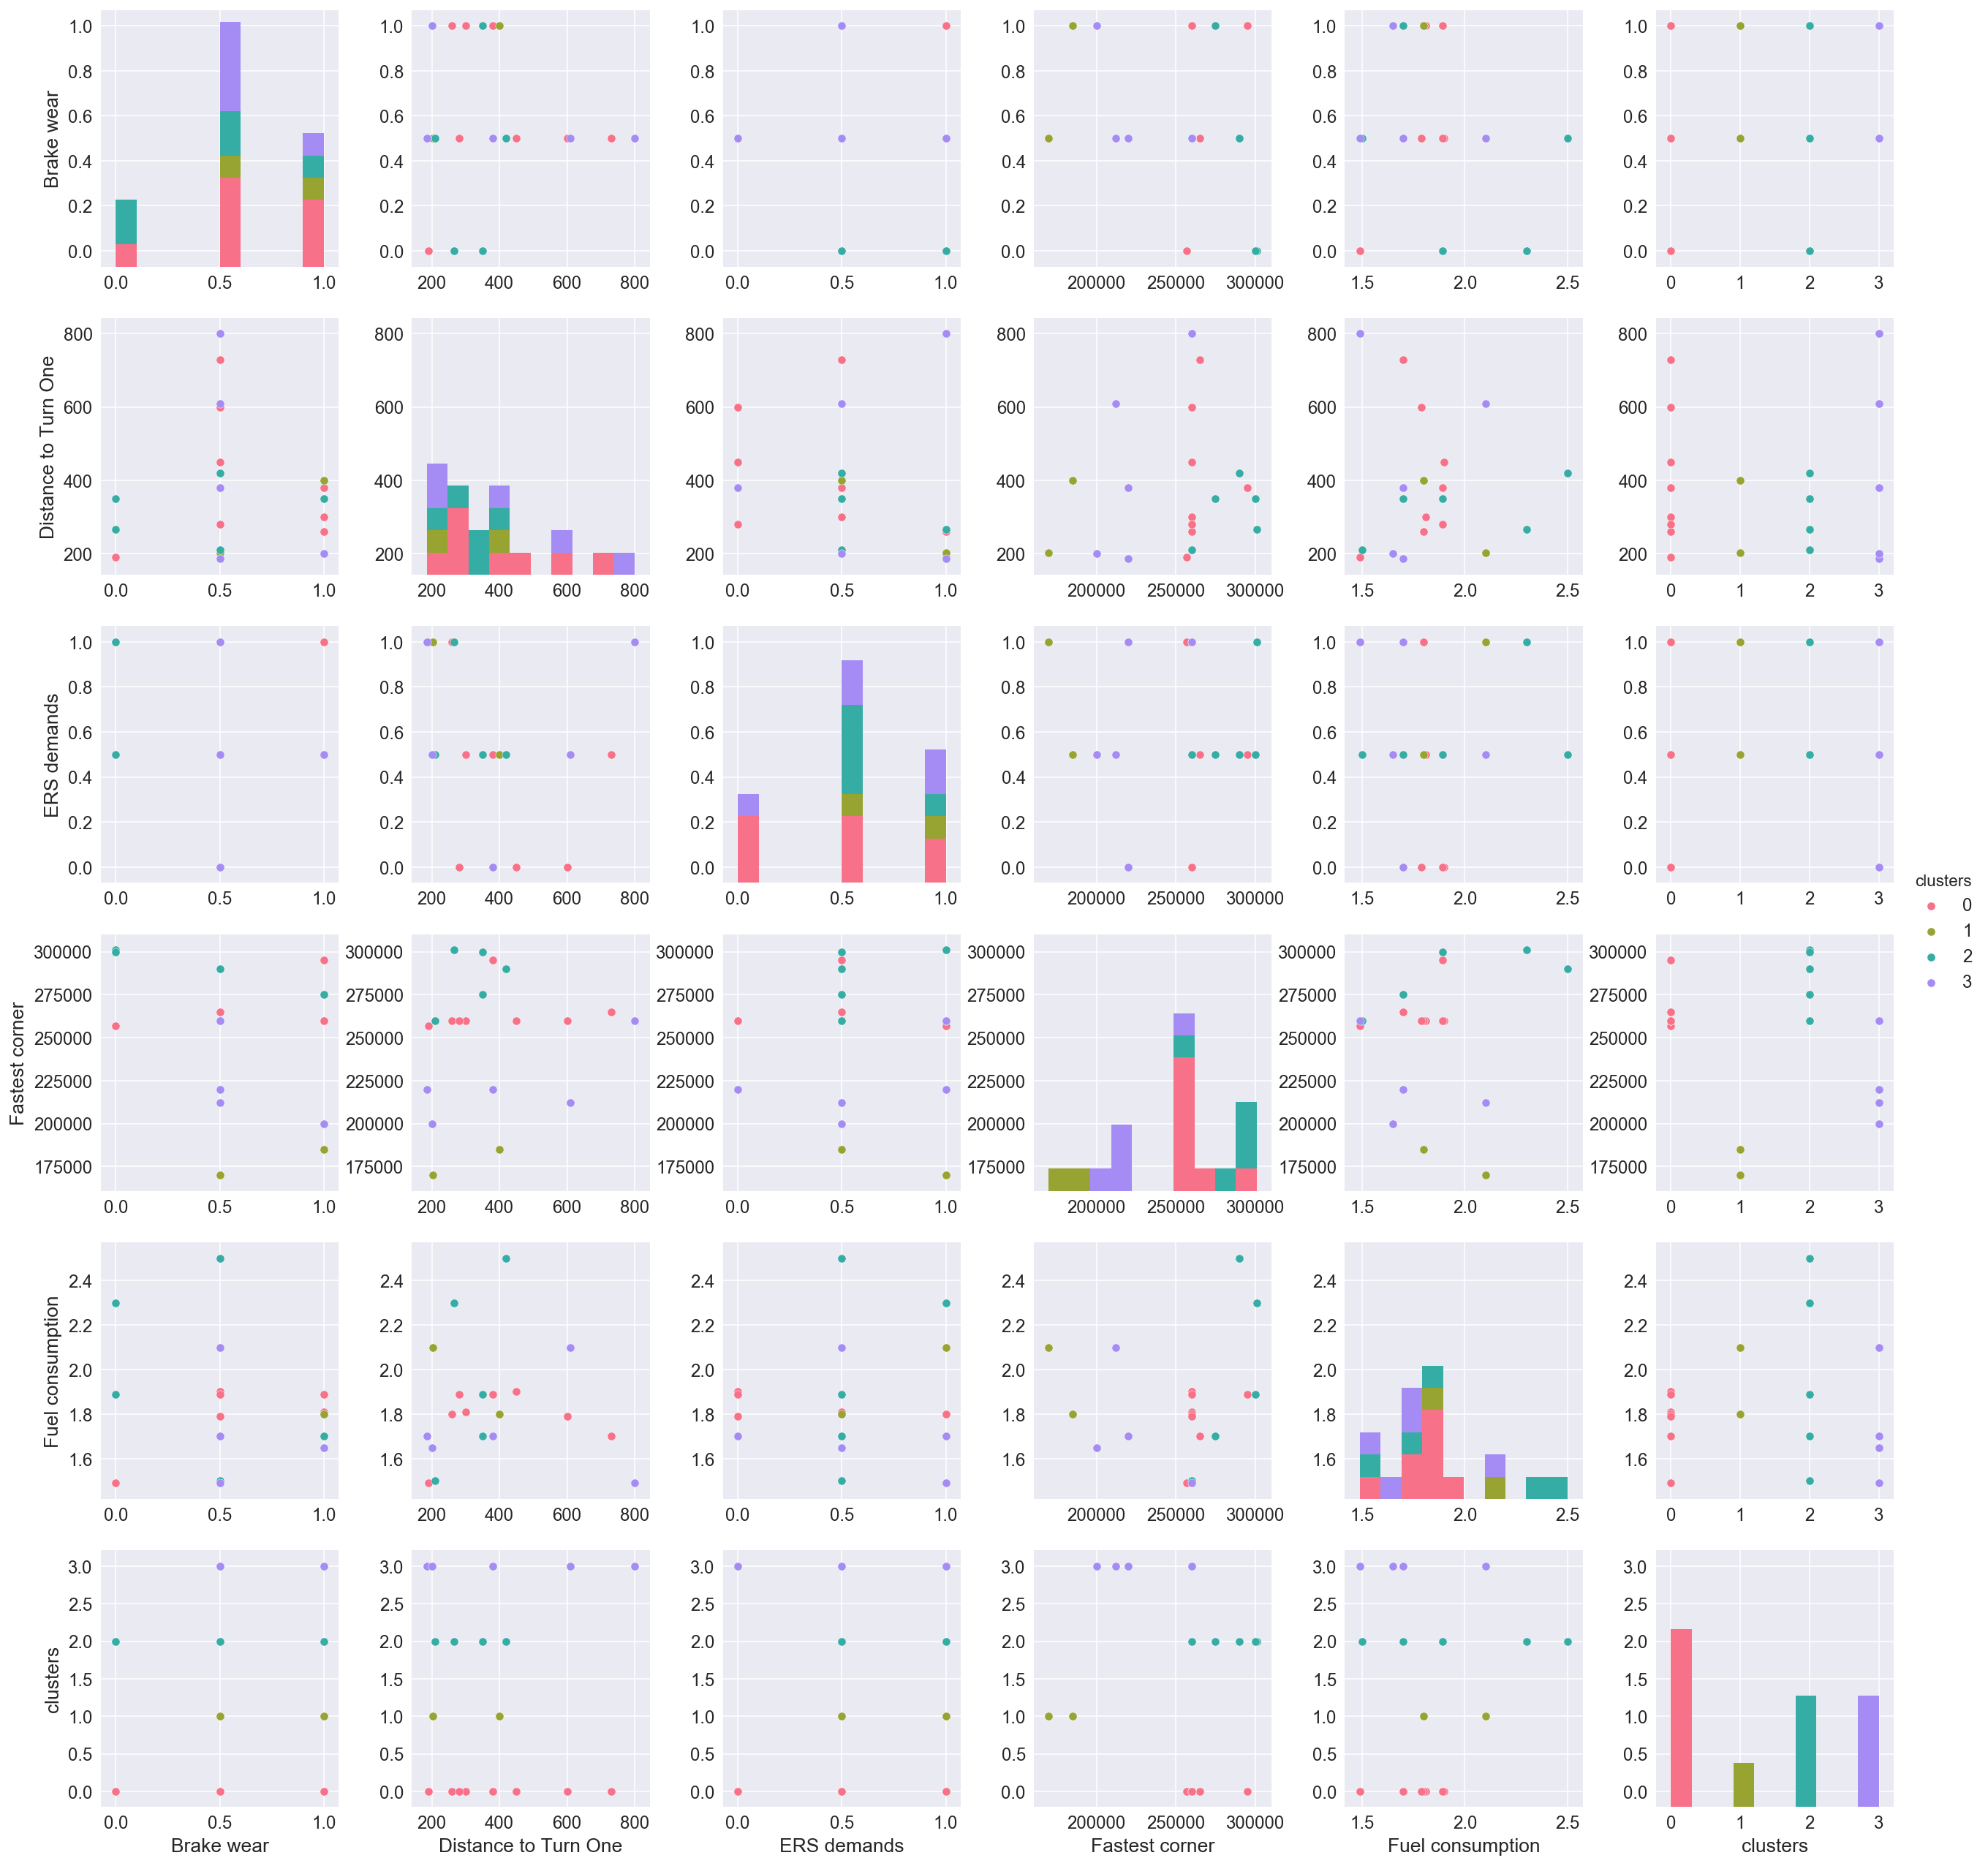

In [220]:
plt.figure()
sns.set_context("paper", font_scale=1.5)
sns.pairplot(data=X_opt[cols1], hue='clusters', size = 3, palette="husl")
plt.show()
plt.savefig(directory + "knn_pairplot_1.jpg") 

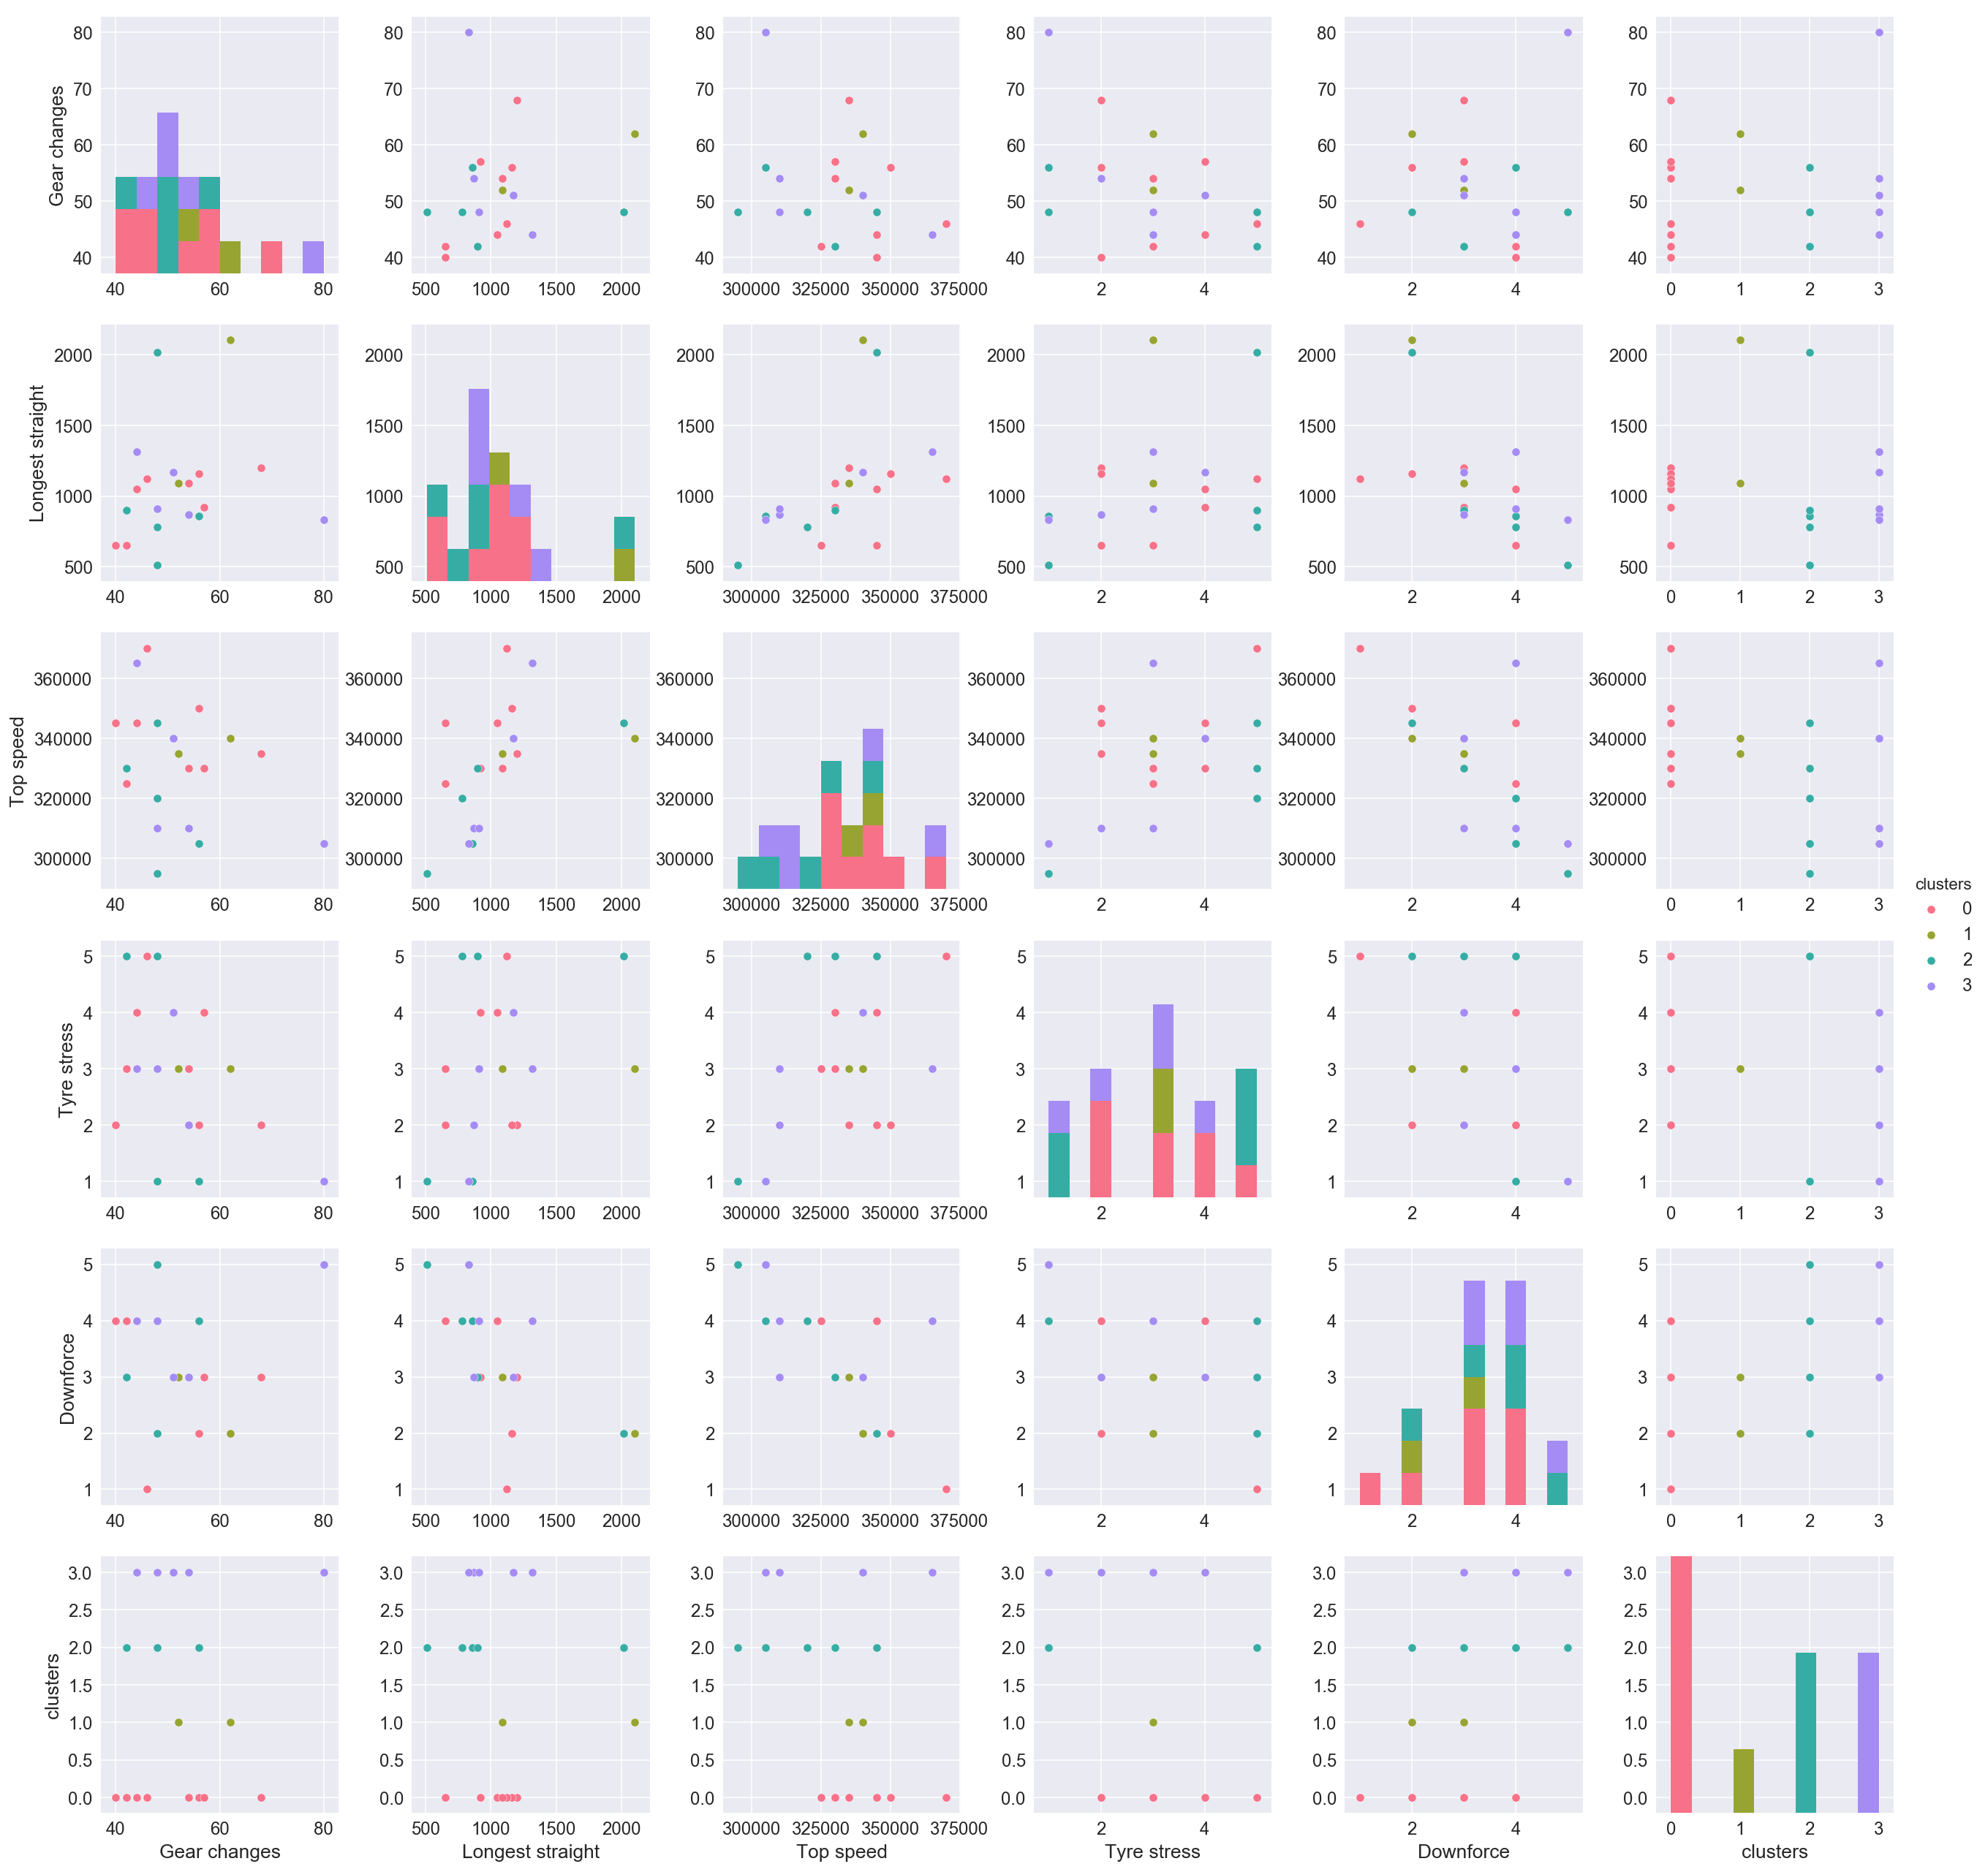

In [221]:
plt.figure()
sns.set_context("paper", font_scale=1.5)
sns.pairplot(data=X_opt[cols2], hue='clusters', size = 3, palette="husl")
plt.show()
plt.savefig(directory + "knn_pairplot_2.jpg") 

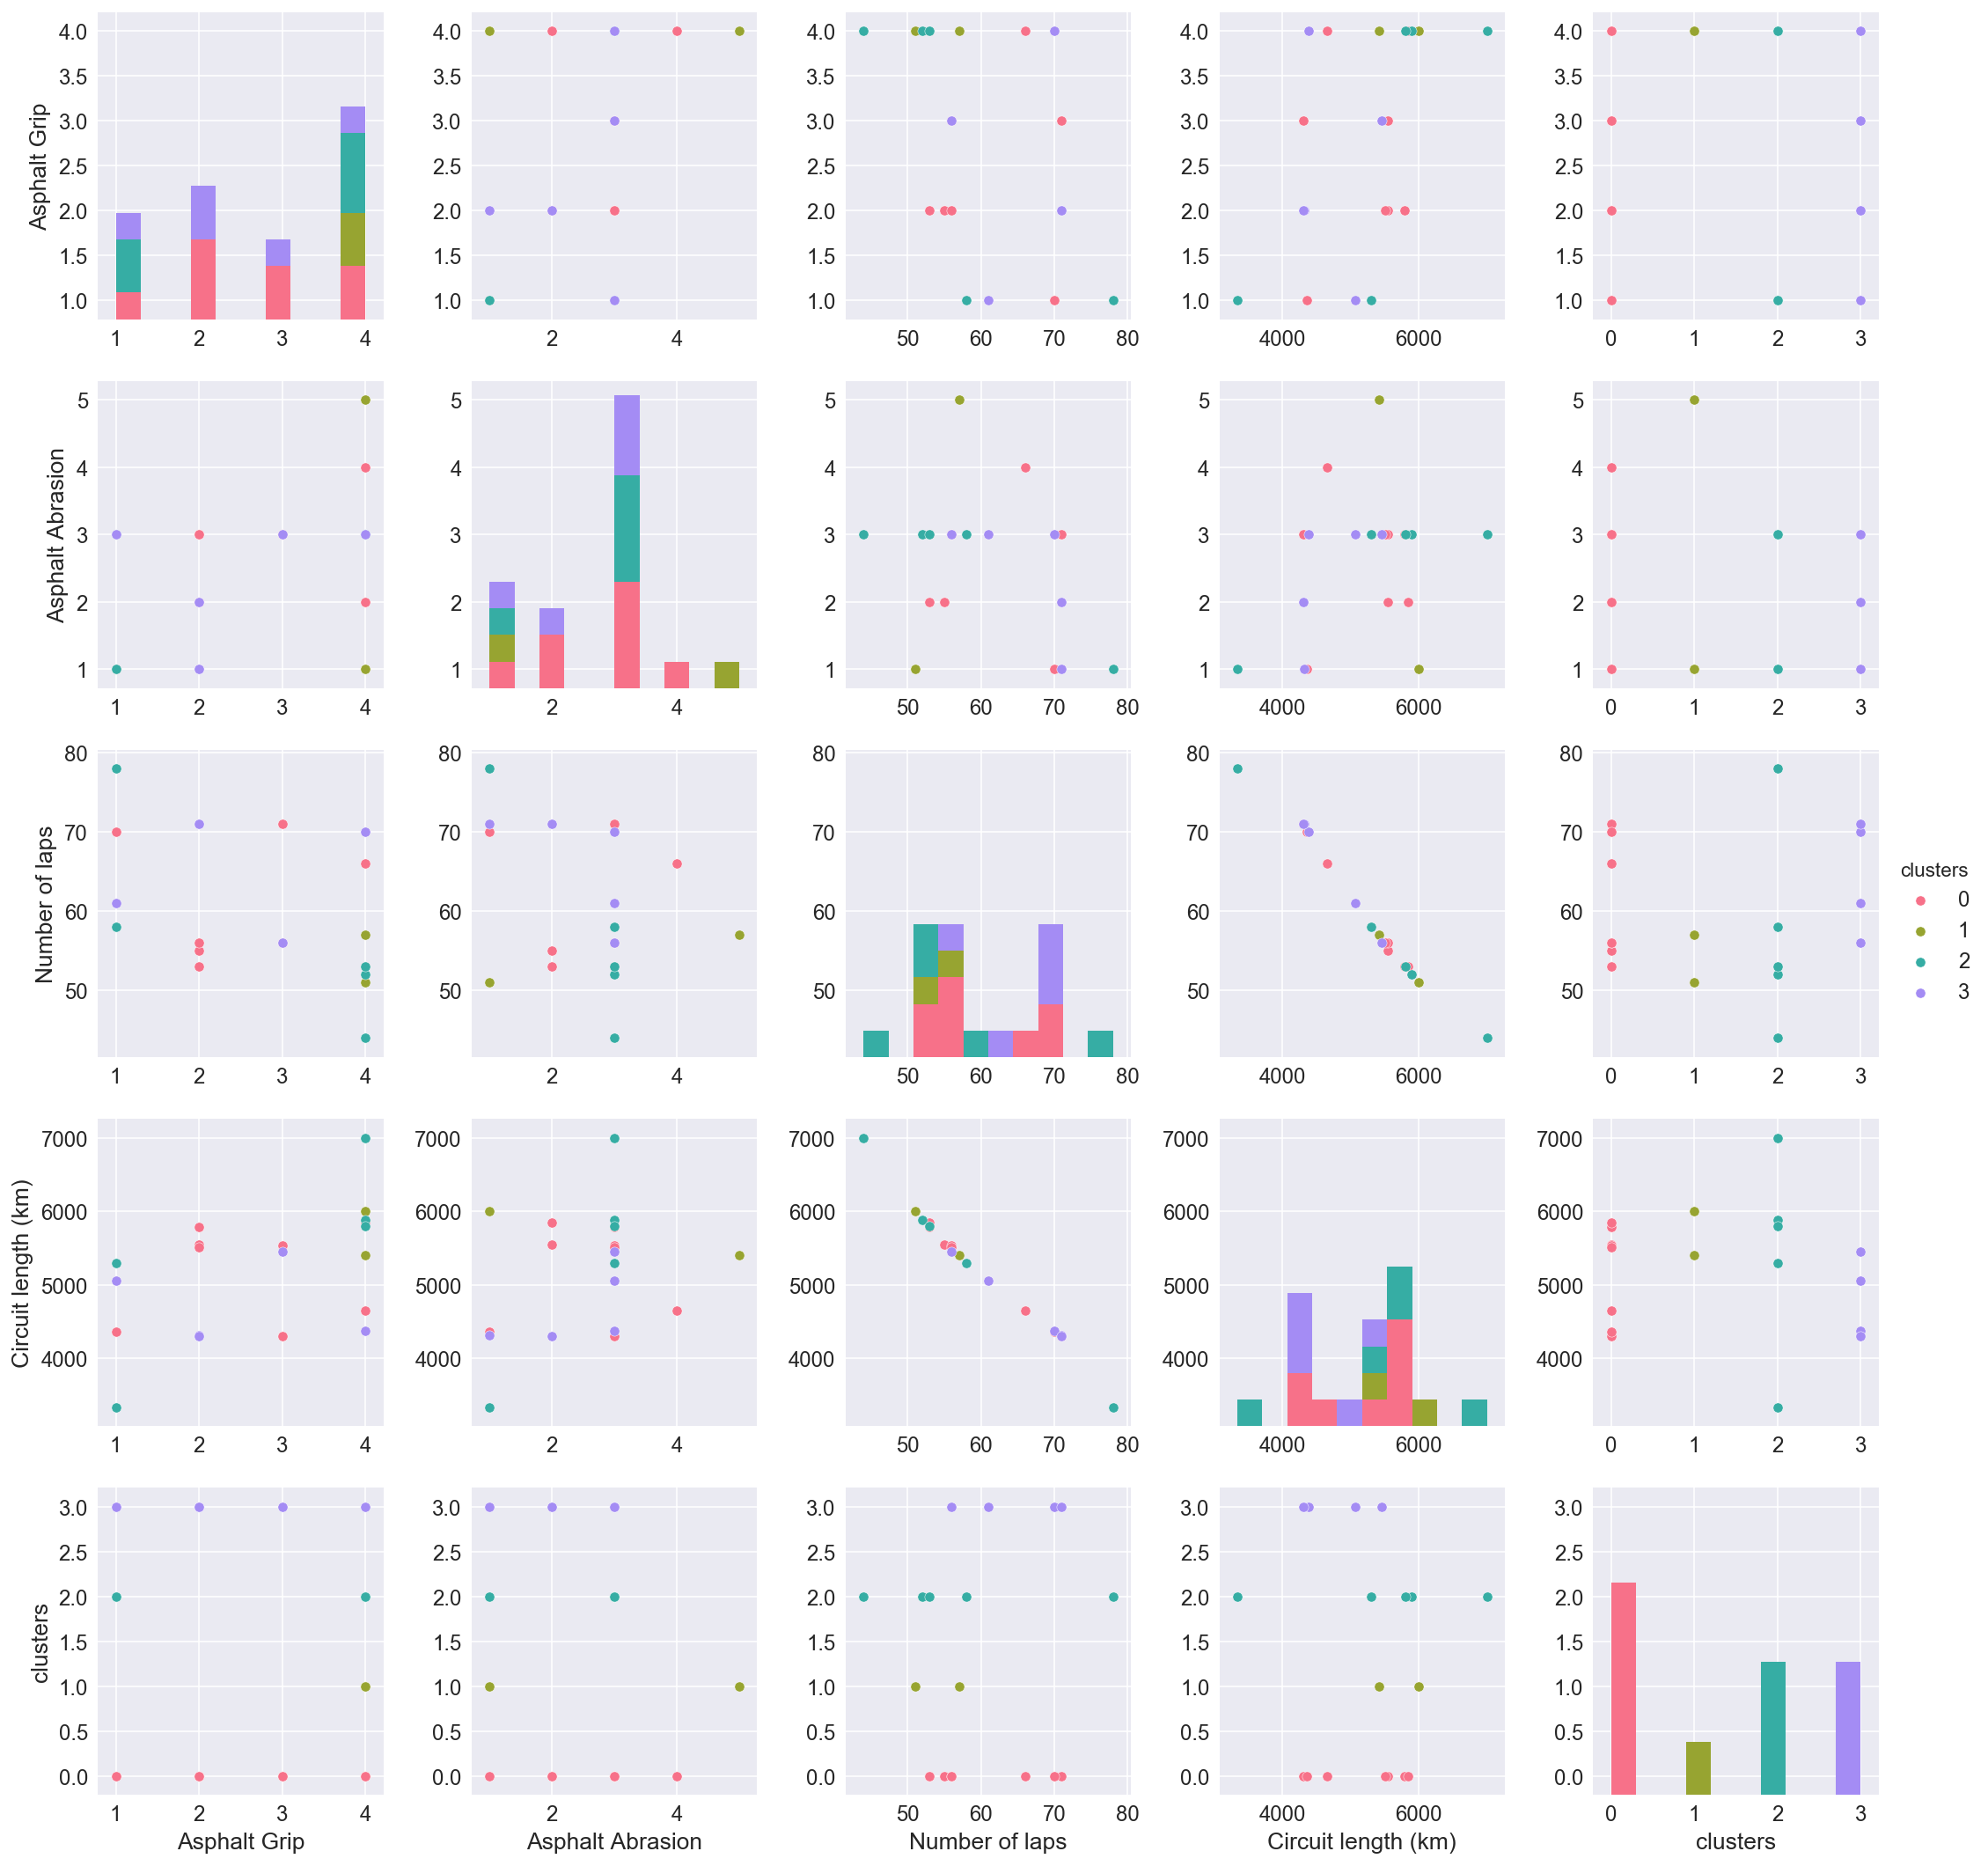

In [222]:
plt.figure()
sns.set_context("paper", font_scale=1.5)
sns.pairplot(data=X_opt[cols3], hue='clusters', size = 3, palette="husl")
plt.show()
plt.savefig(directory + "knn_pairplot_3.jpg") 

#### Test with MinMaxScaler

For n_clusters = 2 The average silhouette_score is : 0.195404580156


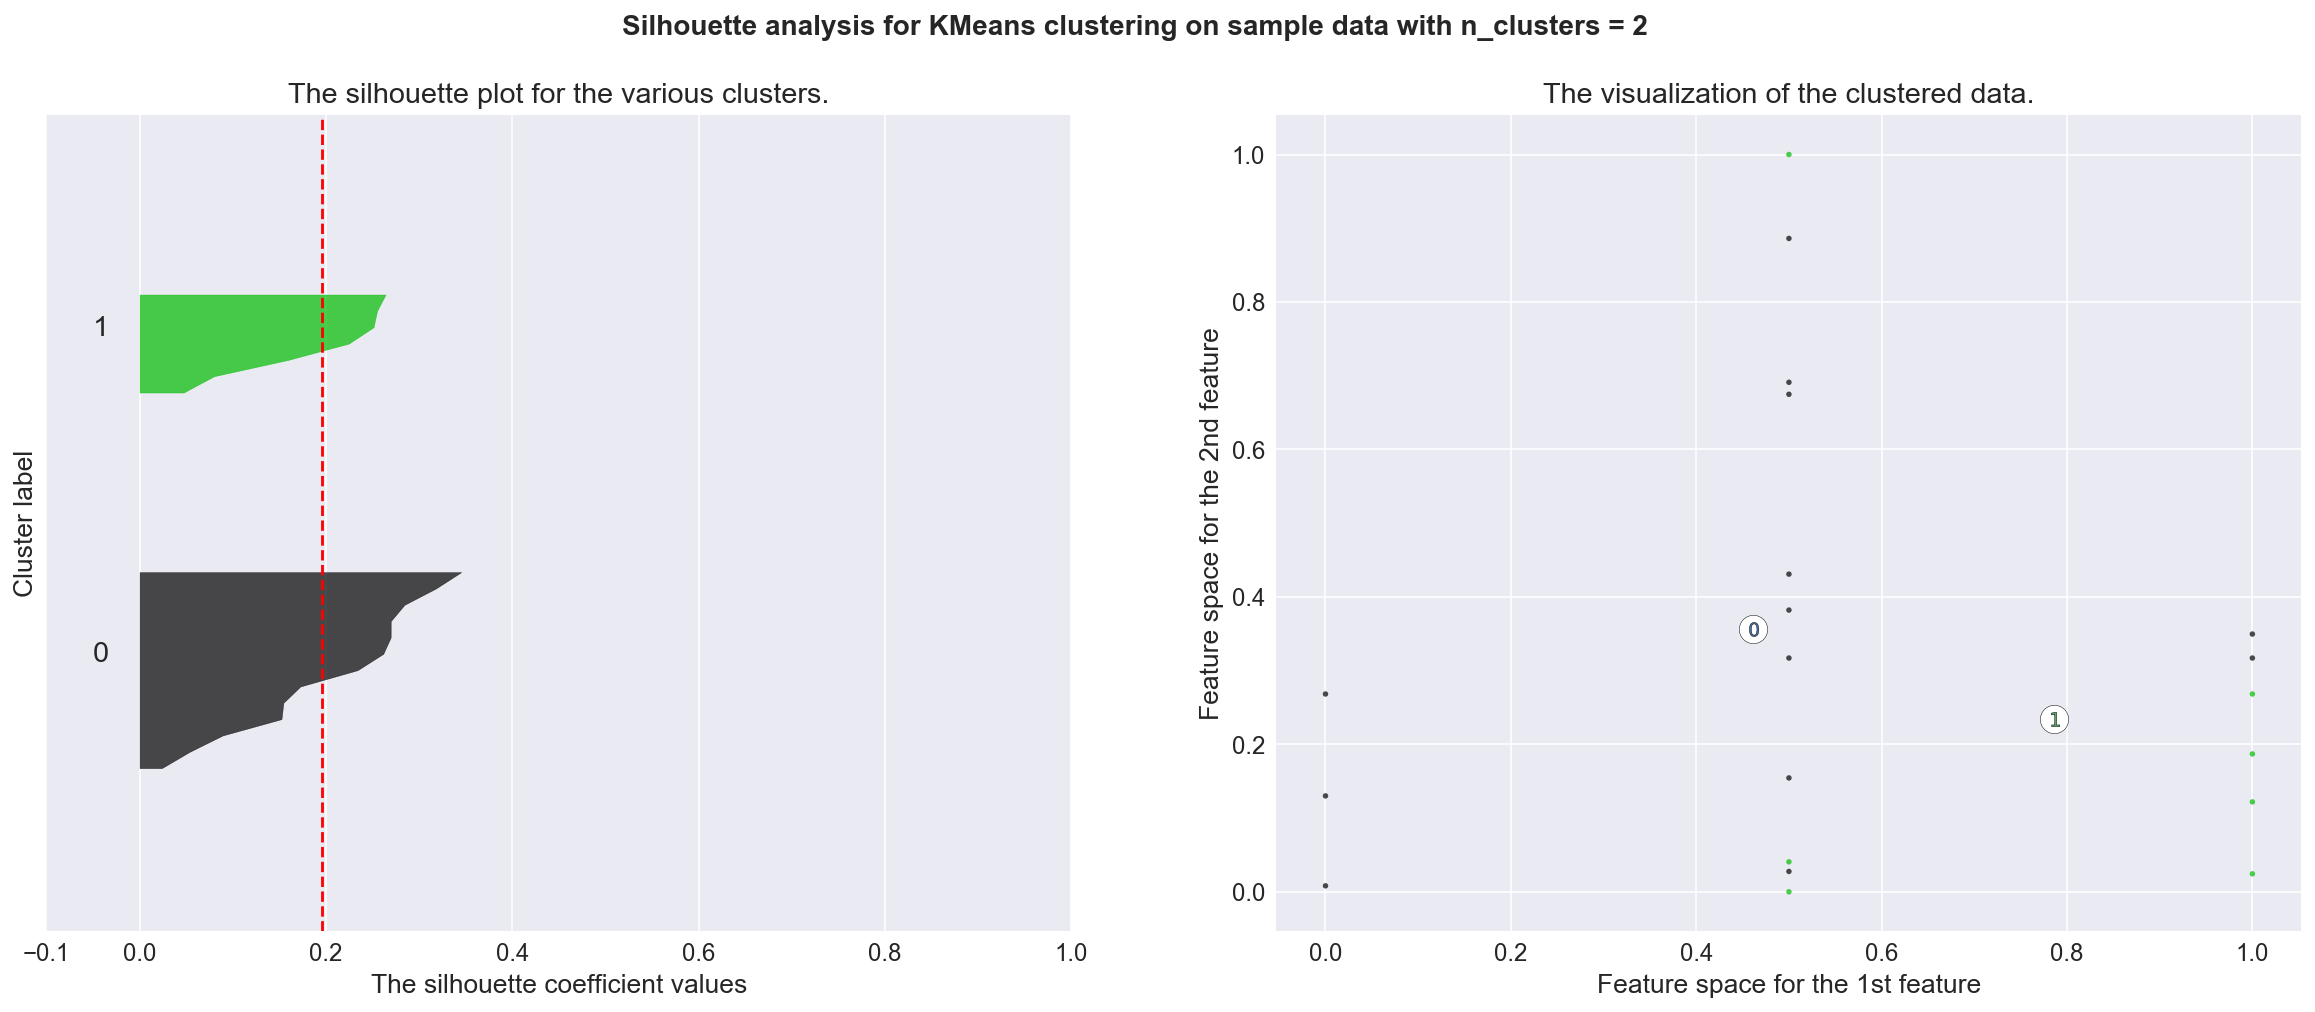

For n_clusters = 3 The average silhouette_score is : 0.16227889205


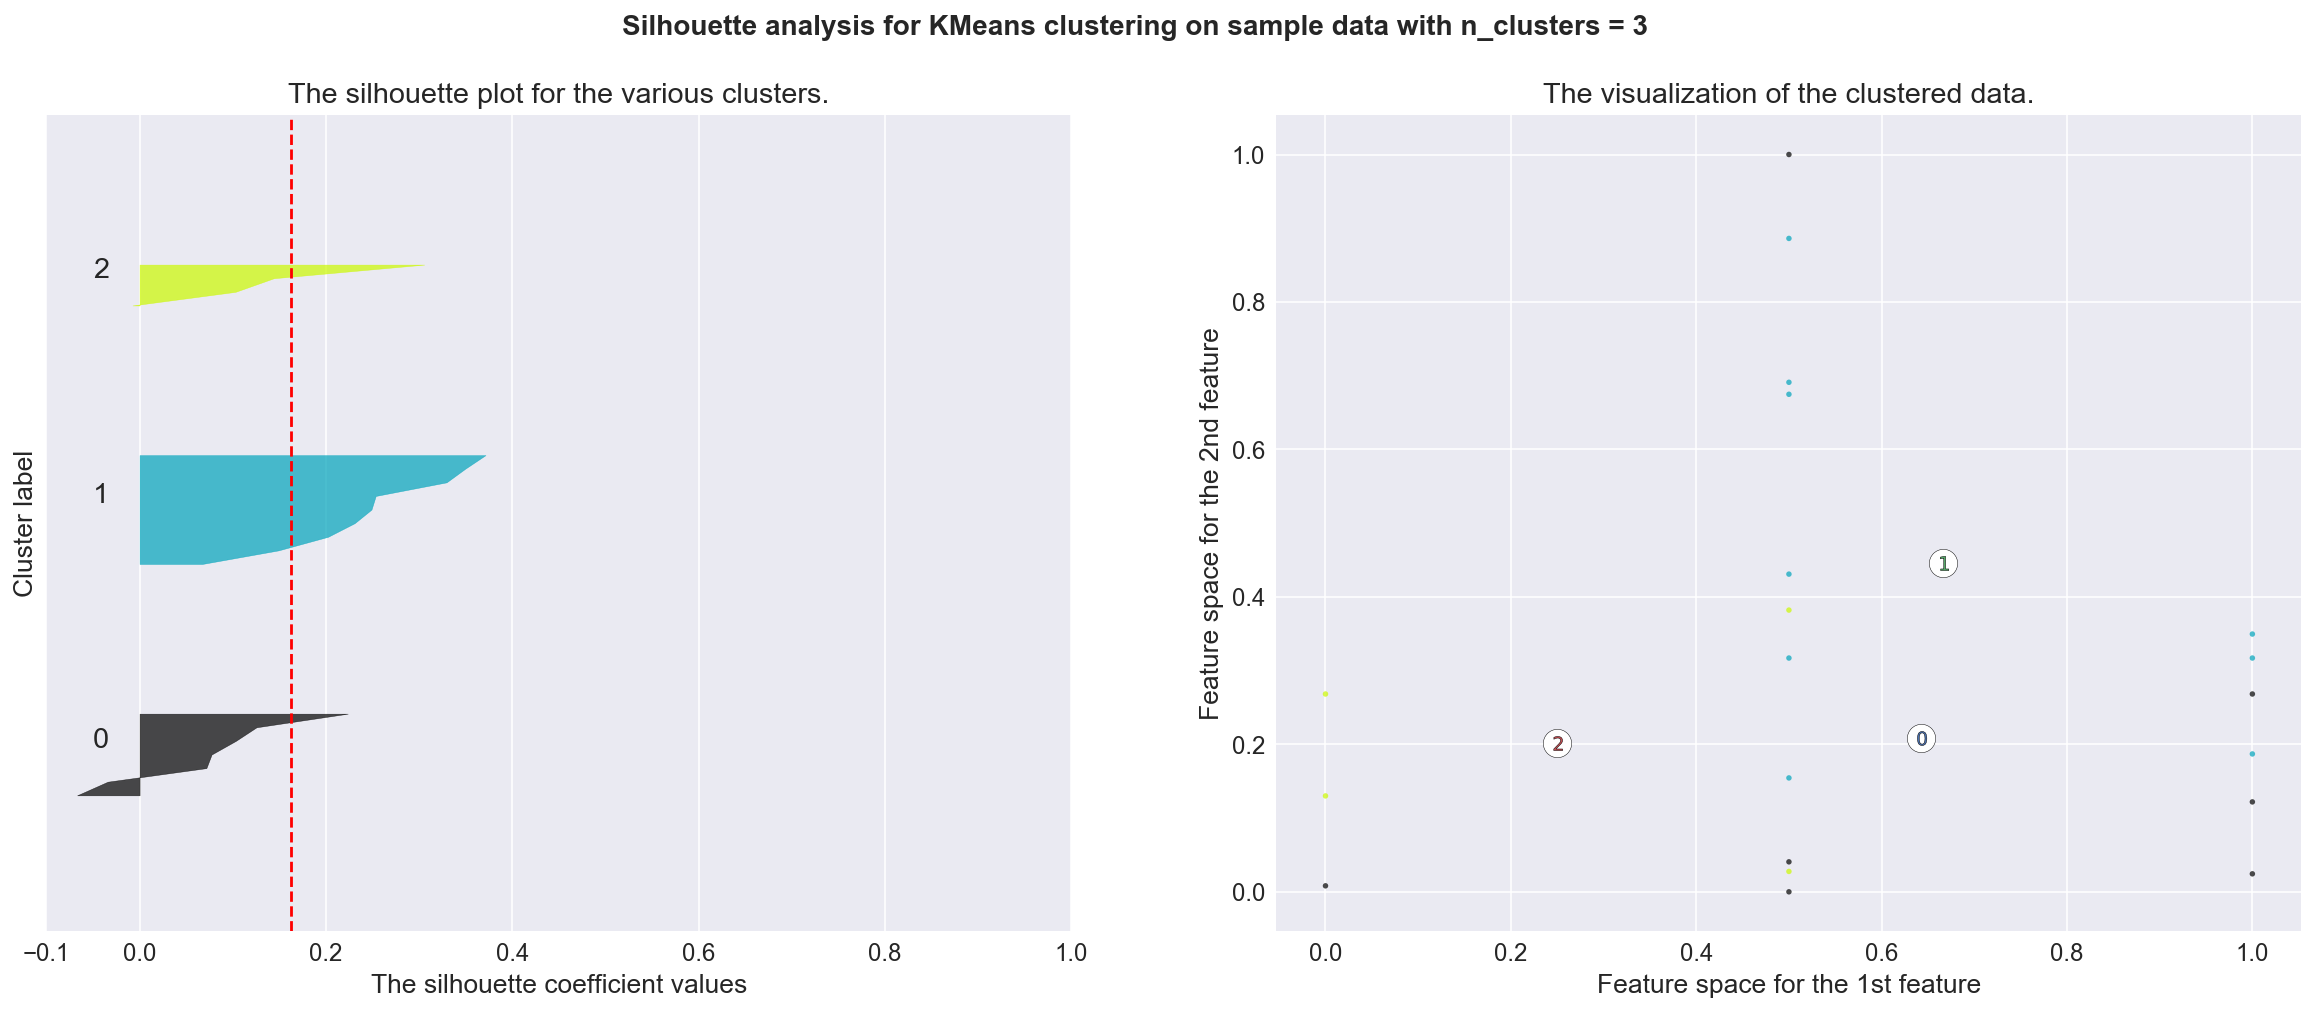

For n_clusters = 4 The average silhouette_score is : 0.172527204374


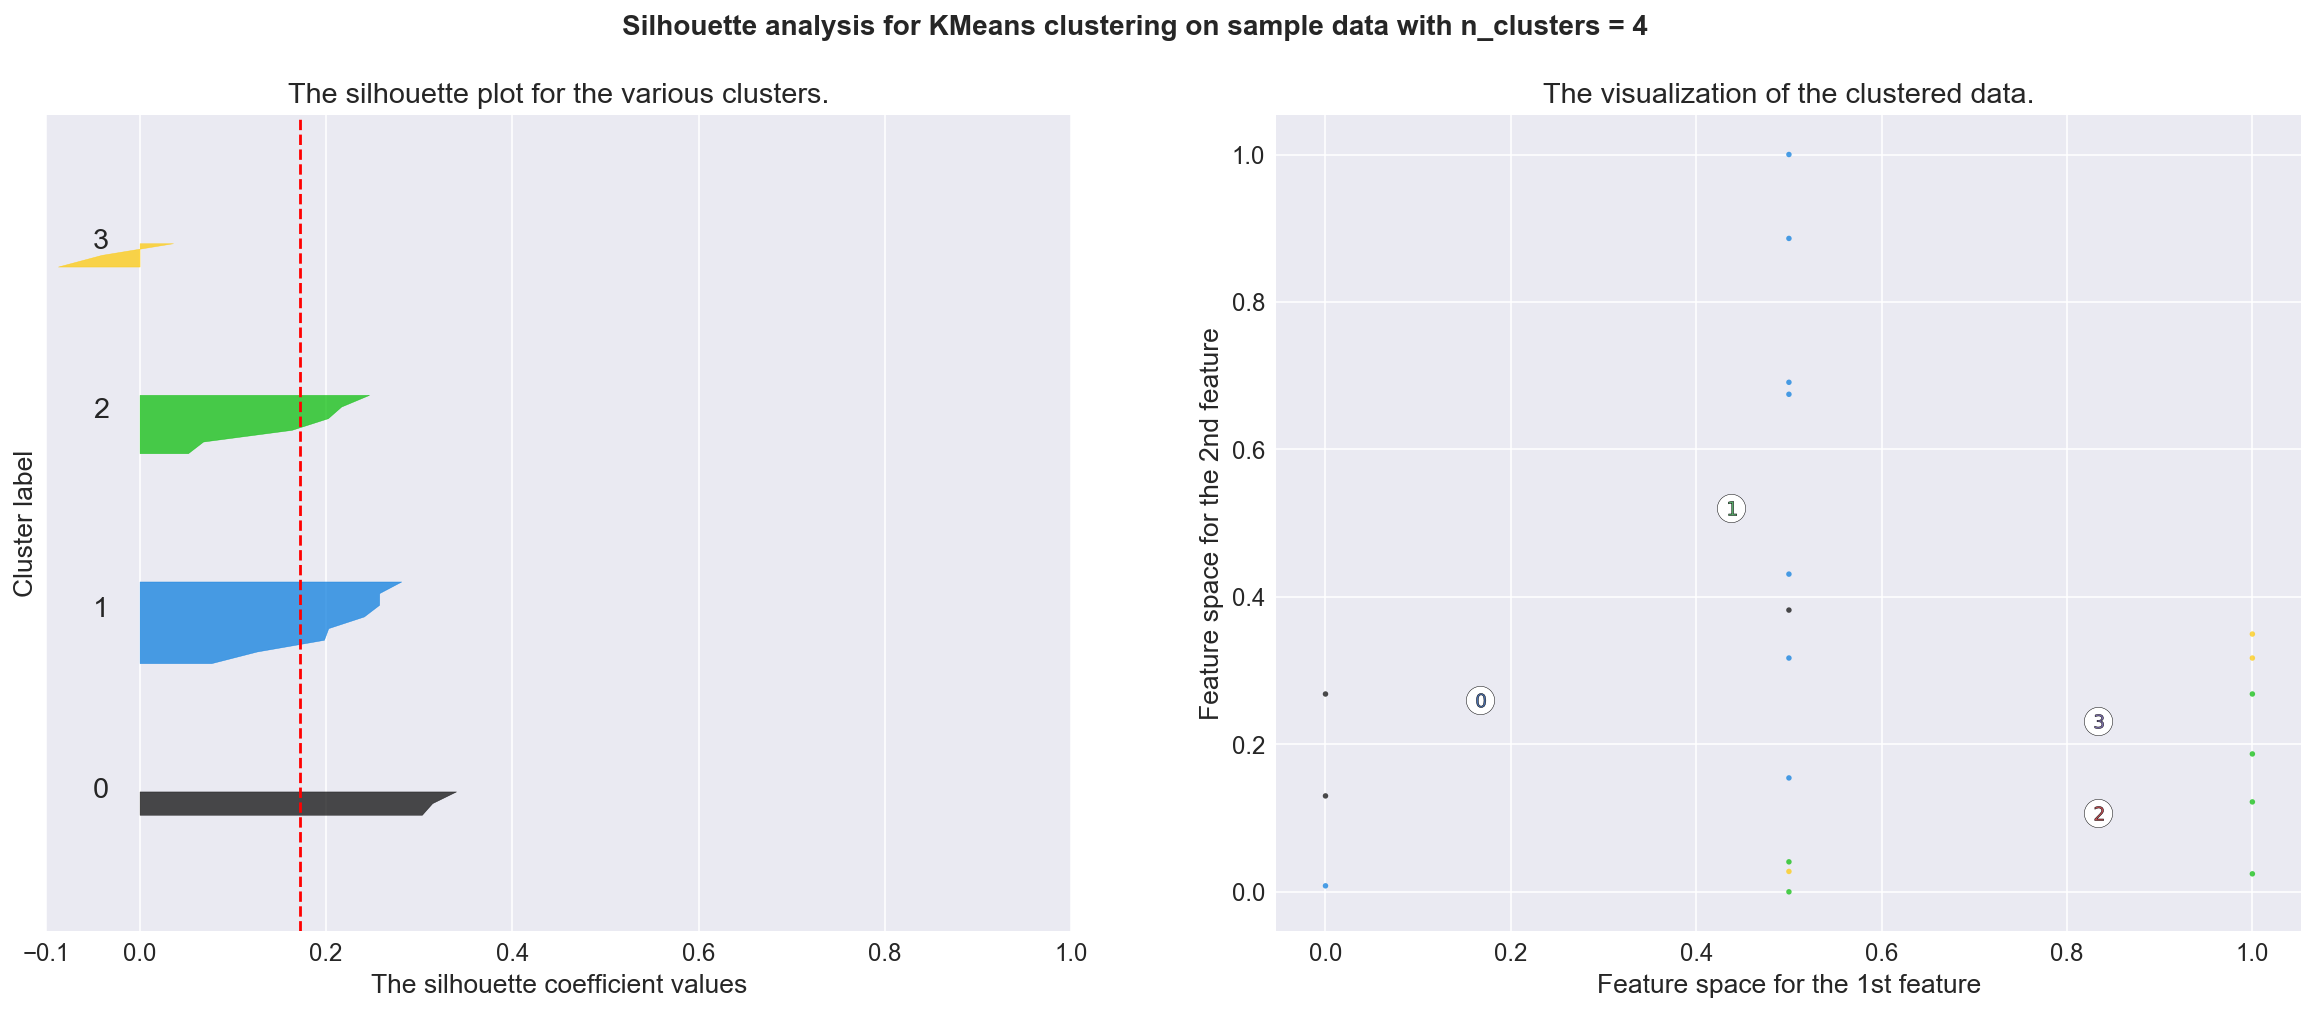

For n_clusters = 5 The average silhouette_score is : 0.160247246547


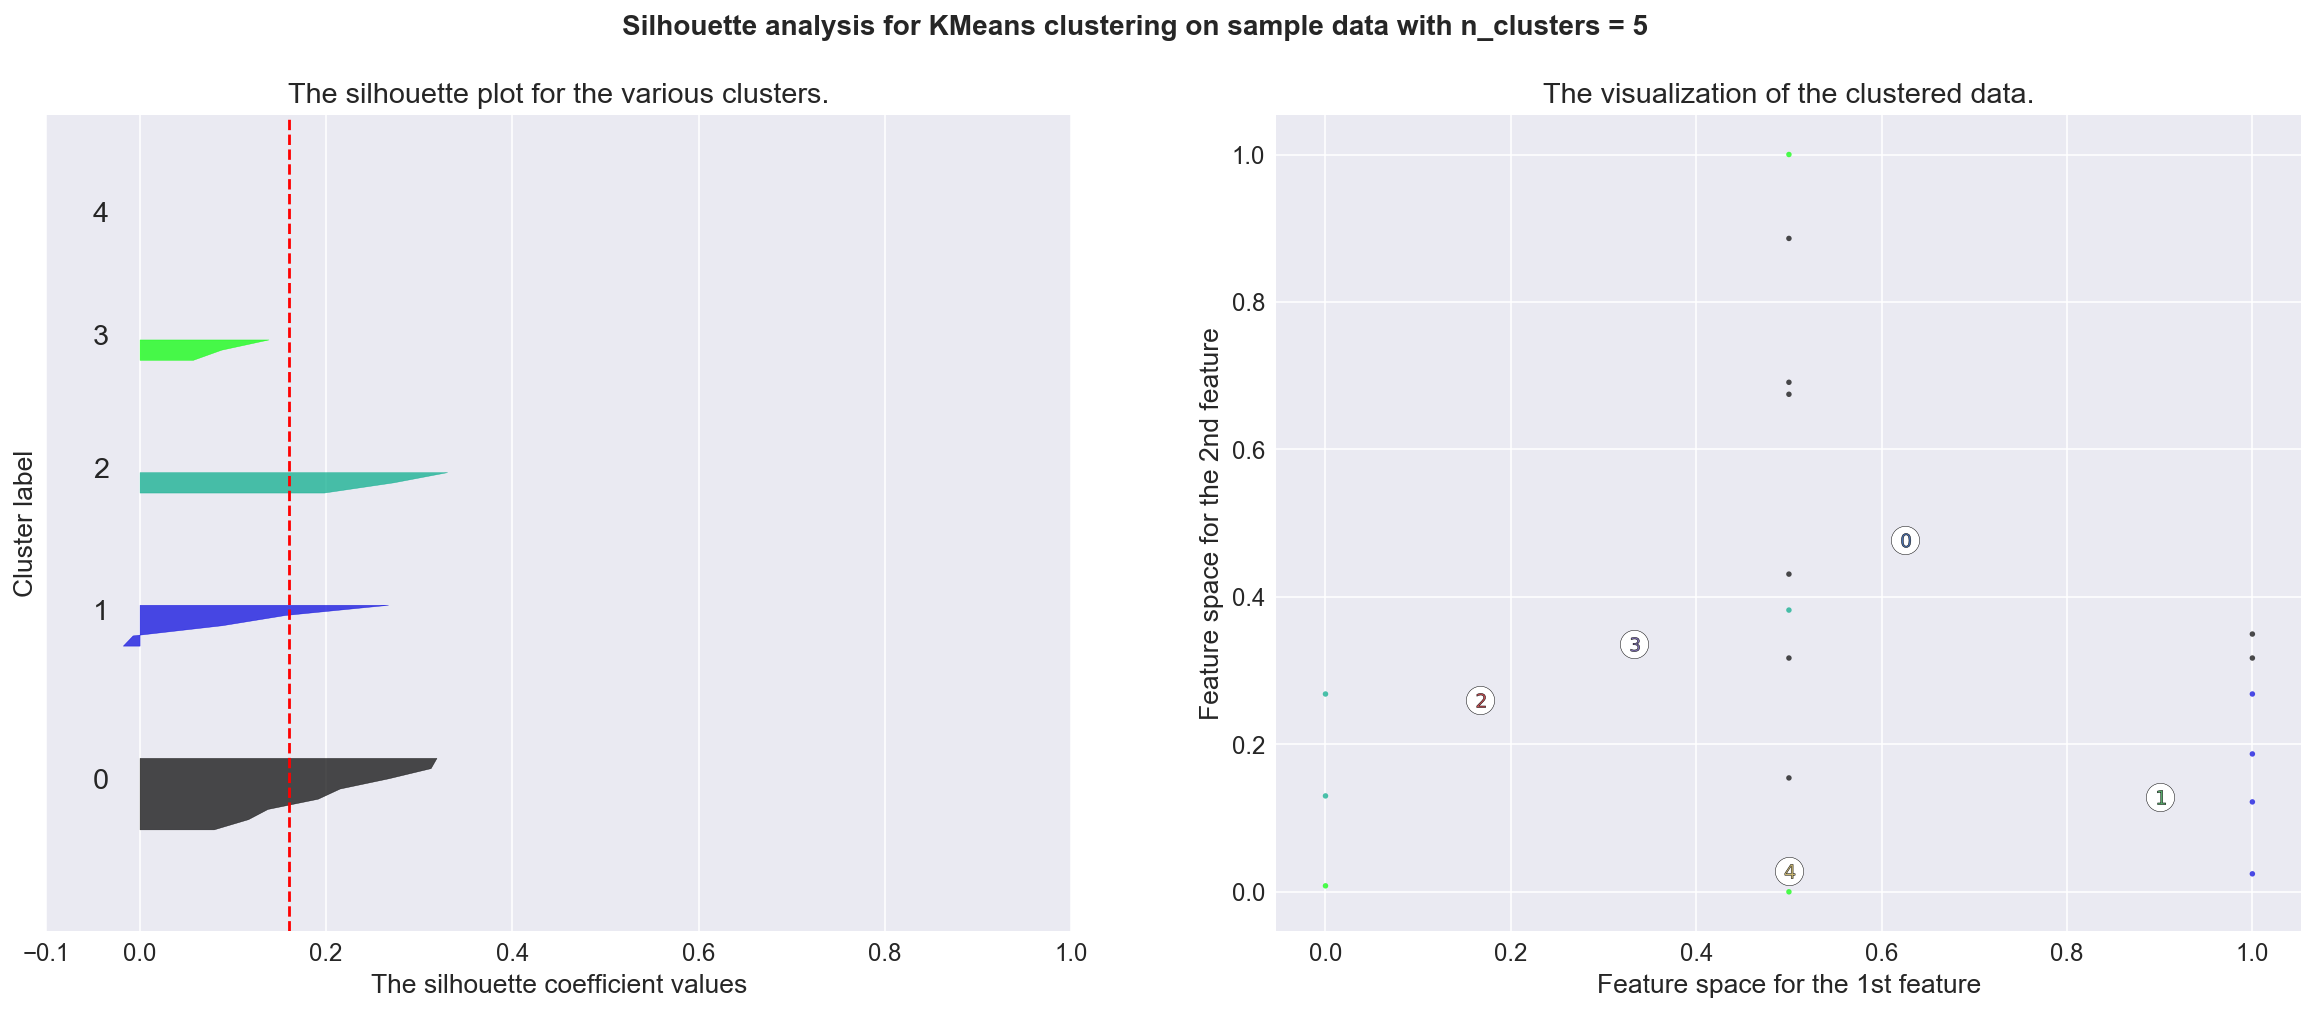

For n_clusters = 6 The average silhouette_score is : 0.158220085948


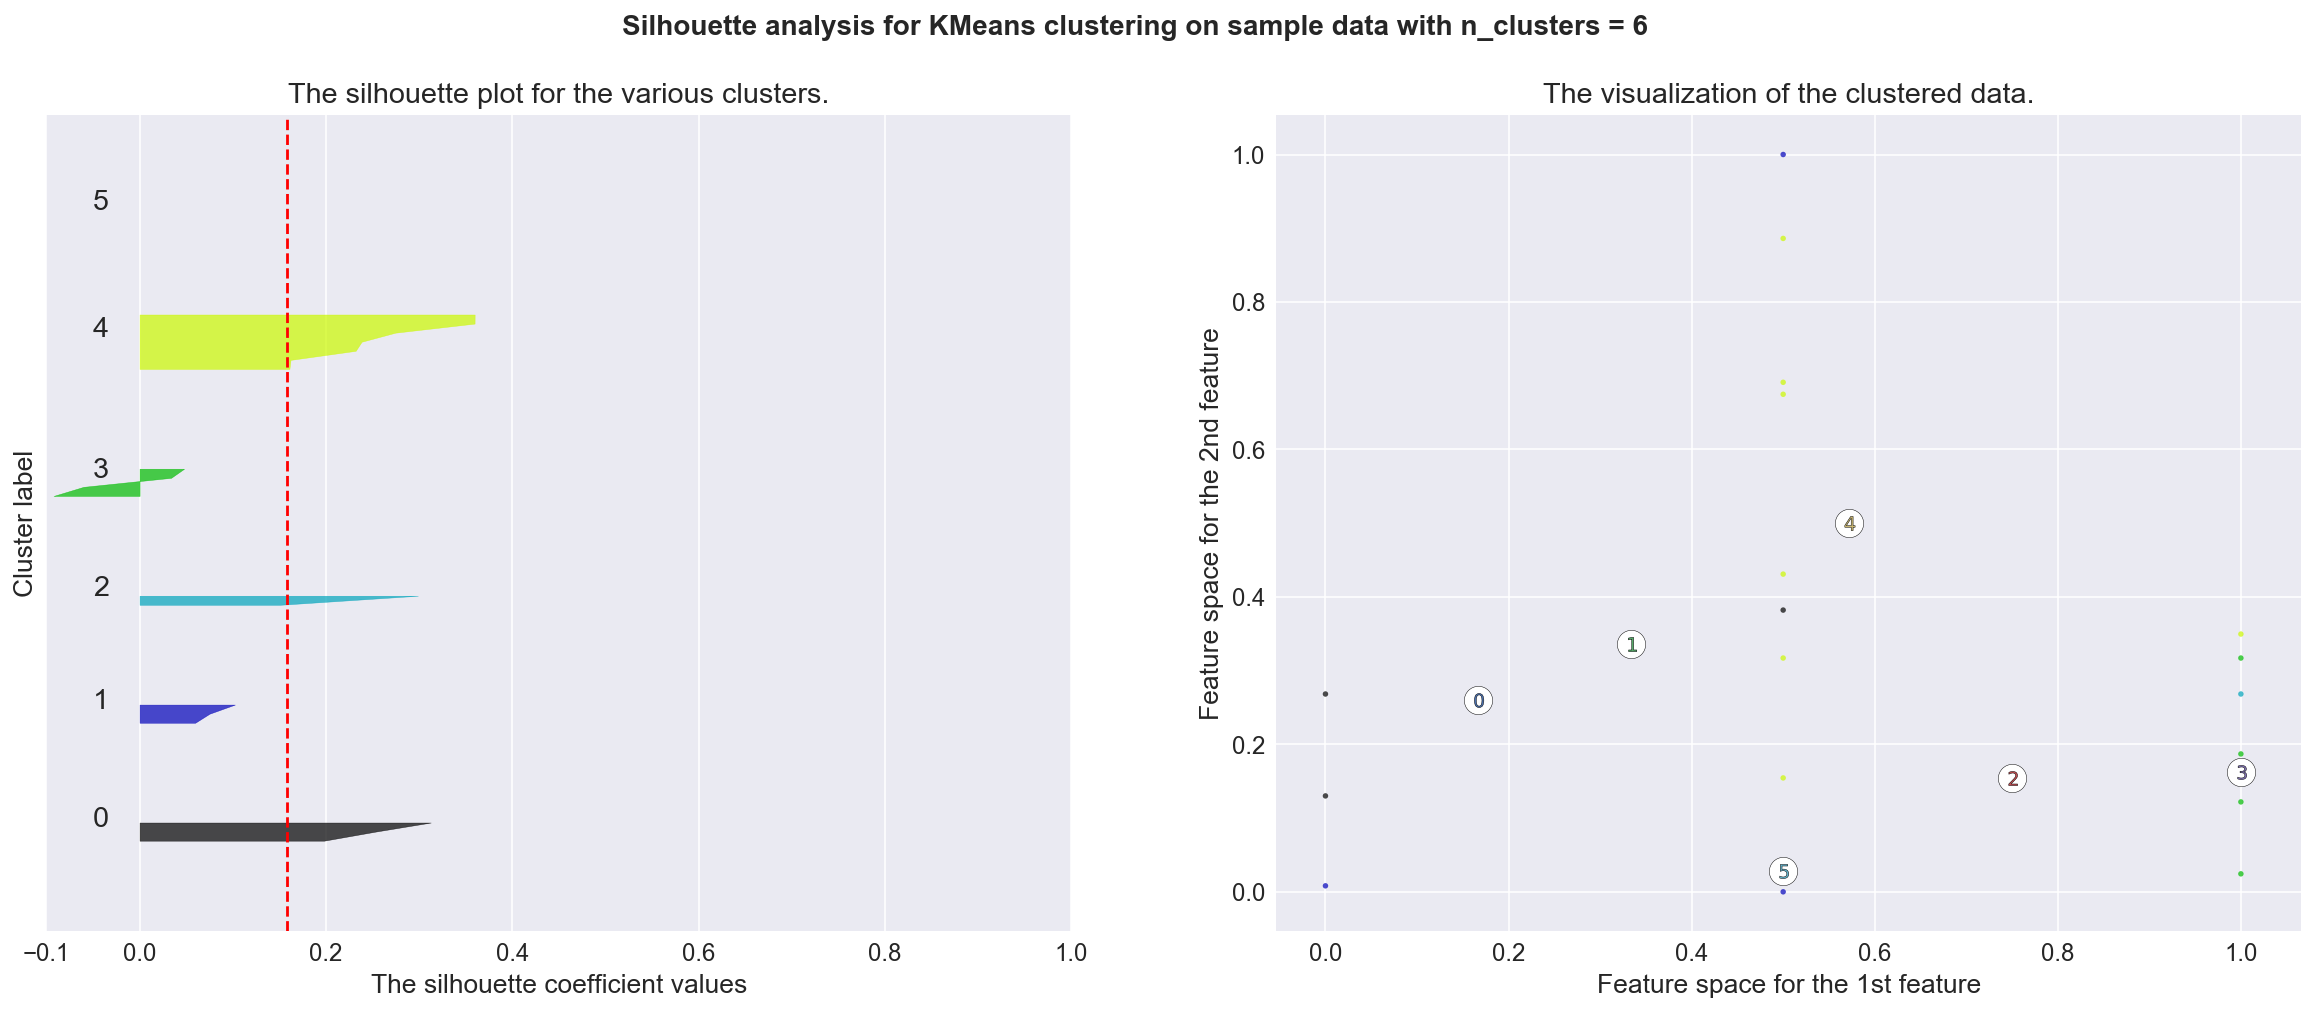

In [219]:
MM = MinMaxScaler()
Xmm = MM.fit_transform(X)
plot_silhouette_score(Xmm)

In [ ]:
#### Findings: min max scaler gives terrible clustering results based on silhouette score